In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTETomek
from pyod.models.iforest import IForest
from scipy.stats import uniform, randint


# Paso 1: Cargar y preparar los datos
file_path = r'C:\Users\gabri\OneDrive\Escritorio\pws\predict+students+dropout+and+academic+success\data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Imprimir las nuevas columnas del conjunto de datos
print(data.columns)



Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [2]:


#Reemplazamos espacios en blanco por "_" en las columnas.
data.columns = data.columns.str.replace(' ', '_')
# Imprimir las nuevas columnas del conjunto de datos
print(data.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance\t', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd

In [4]:
data.shape

(4424, 37)

In [5]:
#Revisamos si hay valores nulos en la data
data.isnull().sum()

Marital_status                                    0
Application_mode                                  0
Application_order                                 0
Course                                            0
Daytime/evening_attendance\t                      0
Previous_qualification                            0
Previous_qualification_(grade)                    0
Nacionality                                       0
Mother's_qualification                            0
Father's_qualification                            0
Mother's_occupation                               0
Father's_occupation                               0
Admission_grade                                   0
Displaced                                         0
Educational_special_needs                         0
Debtor                                            0
Tuition_fees_up_to_date                           0
Gender                                            0
Scholarship_holder                                0
Age_at_enrol

In [6]:
#Revisamos si existen registros duplicados
duplicados = data.duplicated()
print(duplicados)


0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool


In [7]:
data.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening_attendance\t  Previous_qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous_qualification_(grade)  Nacionality  Mother's_qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's_qualification  ...  Curricular_units_2nd_sem_(credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular_units_2nd_sem_(enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular_units_2nd_sem_(evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular_units_2nd_sem_(approved)  Curricular_units_2nd_sem_(grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular_units_2nd_sem_(without_evaluations)  Unemployment_rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation_rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [3]:

X = data.drop('Target', axis=1)
y = data['Target']

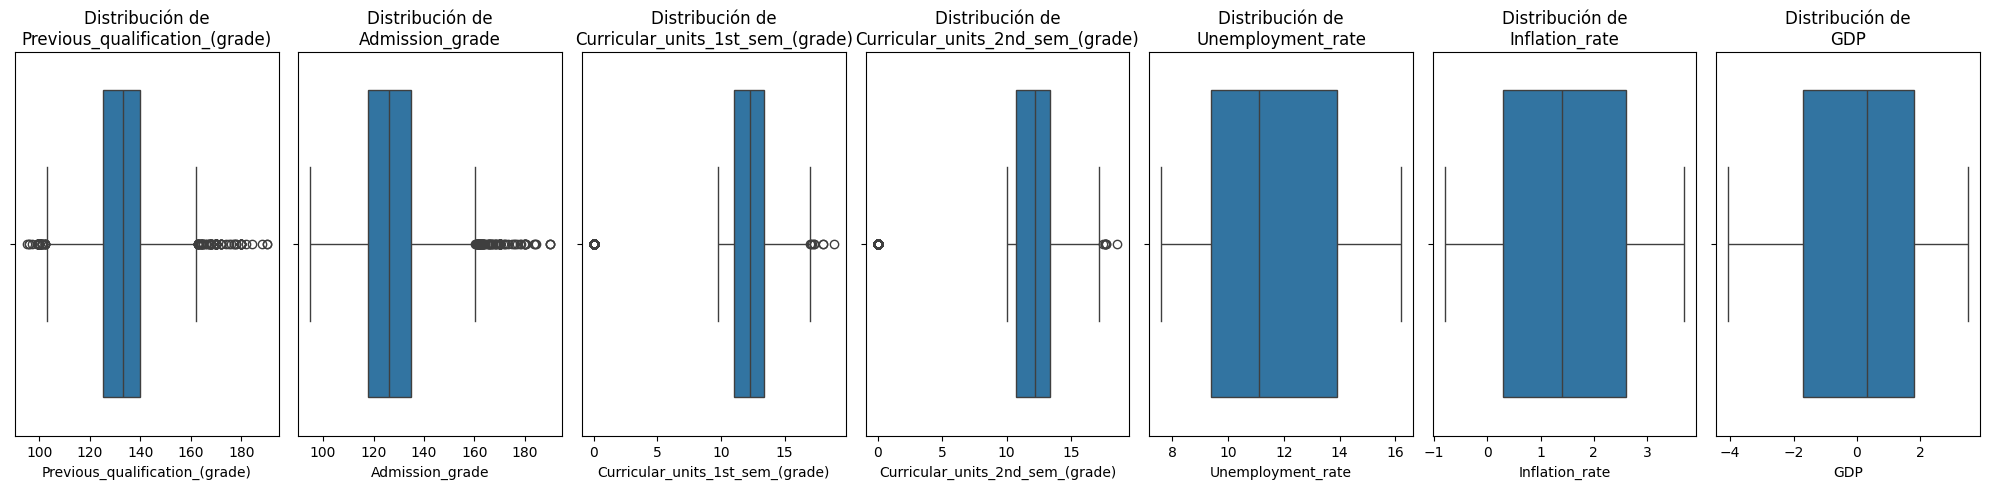

In [4]:
# Variables continuas después de filtrar los outliers
vars_continuas_filtradas = X.select_dtypes(include=['float64']).columns

# Crear subplots para cada variable continua filtrada
fig, axes = plt.subplots(nrows=1, ncols=len(vars_continuas_filtradas), figsize=(20, 5))

# Iterar sobre las variables continuas filtradas y crear un boxplot para cada una
for i, var in enumerate(vars_continuas_filtradas):
    sns.boxplot(x=X[var], ax=axes[i])
    axes[i].set_title(f'Distribución de\n{var}')

plt.tight_layout()
plt.show()

In [4]:
# Ocupación de la madre
mother_occupation_counts = X["Mother's_occupation"].value_counts(normalize=True) * 100
print("Porcentaje de ocupación de la madre:")
print(mother_occupation_counts)

# Ocupación del padre
father_occupation_counts = X["Father's_occupation"].value_counts(normalize=True) * 100
print("\nPorcentaje de ocupación del padre:")
print(father_occupation_counts)


Porcentaje de ocupación de la madre:
Mother's_occupation
9      35.646474
4      18.467450
5      11.980108
3       7.933996
2       7.188065
7       6.148282
0       3.254973
1       2.305606
6       2.056962
90      1.582278
8       0.813743
191     0.587703
99      0.384268
194     0.248644
141     0.180832
123     0.158228
144     0.135624
175     0.113020
192     0.113020
193     0.090416
134     0.090416
10      0.090416
143     0.067812
151     0.067812
132     0.067812
152     0.045208
122     0.045208
153     0.045208
173     0.022604
125     0.022604
131     0.022604
171     0.022604
Name: proportion, dtype: float64

Porcentaje de ocupación del padre:
Father's_occupation
9      22.830018
7      15.054250
5      11.663653
4       8.725136
3       8.679928
8       7.188065
10      6.012658
6       5.470163
2       4.452984
1       3.028933
0       2.893309
90      1.469259
99      0.429476
193     0.339060
144     0.180832
171     0.180832
192     0.135624
163     0.113020
103 

In [8]:


# Paso 2: Aplicar Isolation Forest en todo el conjunto de datos
clf = IForest(n_estimators=100, contamination=0.02, random_state=42)
clf.fit(X)
outliers = clf.labels_

X_filtered = X[outliers == 0]
y_filtered = y[outliers == 0].reset_index(drop=True)


# Imprimir el tamaño de los datos filtrados
print("Tamaño de los datos filtrados:", X_filtered.shape)




Tamaño de los datos filtrados: (4335, 36)


In [9]:
# Paso 4: Dividir los datos en conjunto de entrenamiento, validación y prueba (70-10-20)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y_filtered, test_size=0.3, stratify=y_filtered, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), stratify=y_temp, random_state=42)


In [10]:
# Aplicar LabelEncoder solo al conjunto de entrenamiento
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Transformar las etiquetas de validación y prueba usando el mismo encoder
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [13]:
print(label_encoder.classes_)


['Dropout' 'Enrolled' 'Graduate']


In [11]:

# Paso 5: Escalado (MinMaxScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [12]:
# Paso 6: Selección de características (chi2)
selector = SelectKBest(score_func=chi2)
X_train_chi2 = selector.fit_transform(X_train_scaled, y_train)

# Obtener las puntuaciones de chi-cuadrado para todas las características
chi2_scores = selector.scores_

# Crear un DataFrame para visualizar las puntuaciones de chi2 de todas las características
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Chi2 Score': chi2_scores})
feature_scores_sorted = feature_scores.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores_sorted)

# Obtener el índice de las características con valores de chi-cuadrado mayores o iguales a 0.5
indices_a_mantener = chi2_scores >= 0.5

# Seleccionar las características relevantes
X_train_features = X_train_scaled[:, indices_a_mantener]
X_val_features = X_val_scaled[:, indices_a_mantener]
X_test_features = X_test_scaled[:, indices_a_mantener]

# Obtener el nombre de las características mantenidas
caracteristicas_mantenidas = X_train.columns[indices_a_mantener].tolist()
print("Características mantenidas:", caracteristicas_mantenidas)

# Imprimir una muestra de los datos de entrenamiento después de la selección de características
print("\nMuestra de datos de entrenamiento después de la selección de características:")
print(pd.DataFrame(X_train_features, columns=caracteristicas_mantenidas).head())


                                           Feature  Chi2 Score
18                              Scholarship_holder  190.968170
15                                          Debtor  175.013565
31                Curricular_units_2nd_sem_(grade)  168.620086
30             Curricular_units_2nd_sem_(approved)  146.112829
17                                          Gender   98.976354
24             Curricular_units_1st_sem_(approved)   94.206846
25                Curricular_units_1st_sem_(grade)   92.169027
16                         Tuition_fees_up_to_date   67.733236
1                                 Application_mode   62.492430
19                               Age_at_enrollment   37.140672
13                                       Displaced   26.023216
32  Curricular_units_2nd_sem_(without_evaluations)   16.370715
0                                   Marital_status   16.022699
26  Curricular_units_1st_sem_(without_evaluations)   11.659948
29          Curricular_units_2nd_sem_(evaluations)    9

In [13]:
# Paso 7: Definir las técnicas de remuestreo y modelos
resampling_techniques = {
    'Tomek Links': TomekLinks(sampling_strategy='auto'), #Downsampling
    'SMOTE': SMOTE(sampling_strategy='auto', random_state=42), #oversampling
    'SMOTE Tomek': SMOTETomek(sampling_strategy='auto', random_state=42),
    'Random Under Sampler': RandomUnderSampler(sampling_strategy='auto', random_state=42)
}   

models = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': randint(100, 300),
            'max_depth': randint(3, 7),
            'learning_rate': uniform(0.01, 0.1),
            'reg_alpha': uniform(0, 1),   # L1 regularization
            'reg_lambda': uniform(1, 3)   # L2 regularization
        }
    },
    'LightGBM': {
    'model': LGBMClassifier(num_leaves=50, force_col_wise=True),  # Ajusta num_leaves según necesites
    'params': {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 7),
        'learning_rate': uniform(0.01, 0.1),
        'reg_alpha': uniform(0, 1),   # L1 regularization
        'reg_lambda': uniform(1, 3)   # L2 regularization
    }
},

    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': randint(50, 200),
            'max_depth': randint(10, 20),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 4)
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': randint(10, 30),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 4)
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.01, 1)
        }
    }
}


In [14]:
# Paso 8: Definir la estrategia de validación cruzada y procesar cada modelo
n_splits = 5
model_results = {}

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for model_name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    
    model_results[model_name] = {}
    
    for resampling_name, resampler in resampling_techniques.items():
        print(f"Modelo: {model_name}, Técnica de Remuestreo: {resampling_name}")
        
        # Remuestrear los datos de entrenamiento
        X_resampled, y_resampled = resampler.fit_resample(X_train_features, y_train_encoded)
        
        # RandomizedSearchCV para encontrar los mejores parámetros
        random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=50, cv=cv, scoring='f1_weighted', n_jobs=-1, random_state=42)
        random_search.fit(X_resampled, y_resampled)
        
        # Evaluar en el conjunto de entrenamiento para detectar sobreajuste
        y_train_pred = random_search.predict(X_resampled)
        train_f1 = f1_score(y_resampled, y_train_pred, average='weighted')
        
        # Almacenar resultados para esta técnica de remuestreo
        model_results[model_name][resampling_name] = {
            'model': random_search.best_estimator_,
            'best_score': random_search.best_score_,
            'train_f1': train_f1
        }

        print(f"Mejores parámetros para {model_name} con {resampling_name}: {random_search.best_estimator_.get_params()}")
        print(f"Mejor puntuación de validación cruzada para {model_name} con {resampling_name}: {random_search.best_score_}")



Modelo: XGBoost, Técnica de Remuestreo: Tomek Links



Resultados para XGBoost + Tomek Links en el conjunto de prueba:
Accuracy: 0.7281, Recall: 0.7281, F1-score: 0.7447
ROC AUC: 0.8933


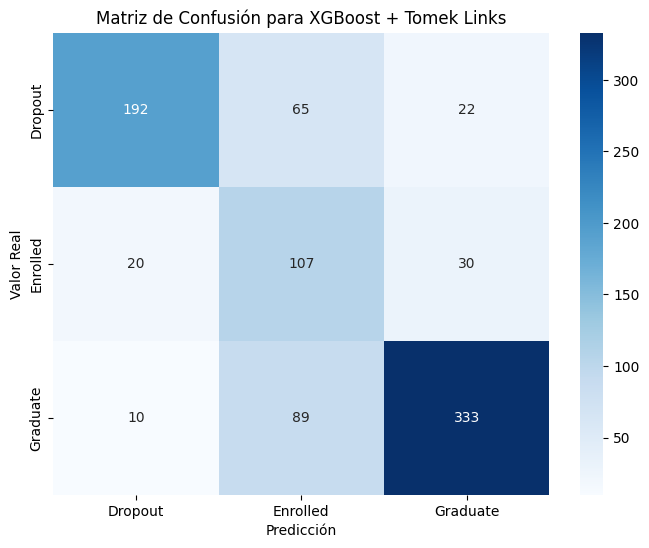

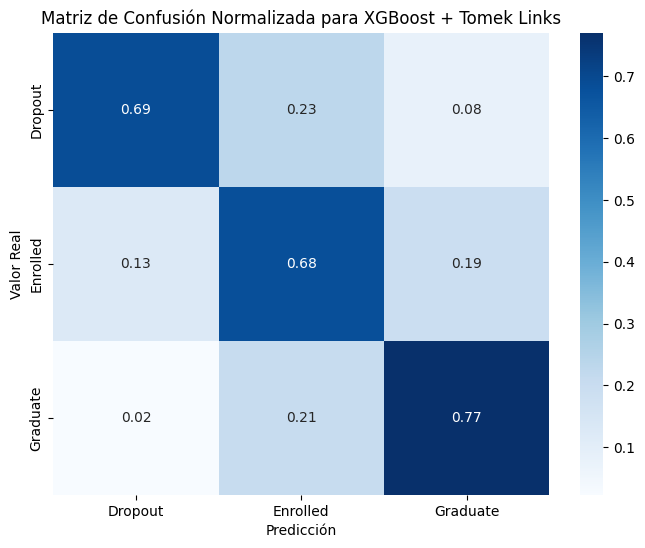

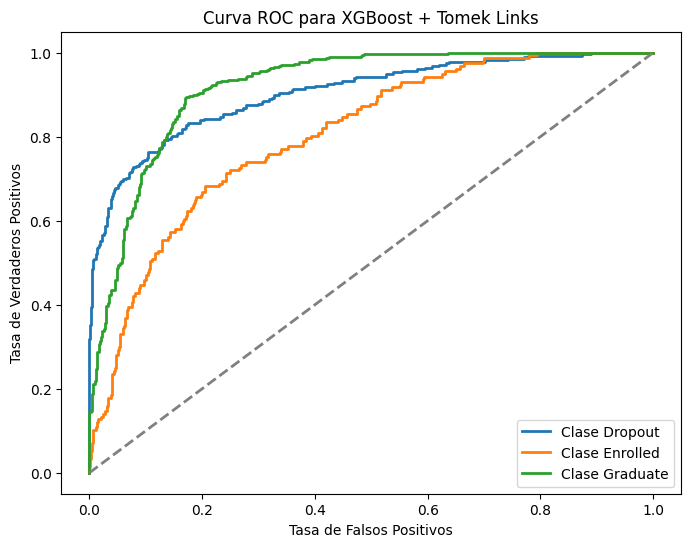

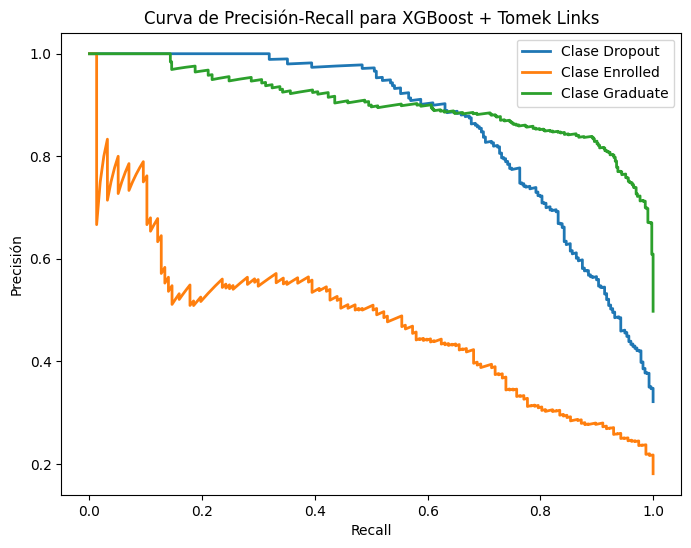

              precision    recall  f1-score   support

     Dropout       0.86      0.69      0.77       279
    Enrolled       0.41      0.68      0.51       157
    Graduate       0.86      0.77      0.82       432

    accuracy                           0.73       868
   macro avg       0.71      0.71      0.70       868
weighted avg       0.78      0.73      0.74       868


Resultados para XGBoost + SMOTE en el conjunto de prueba:
Accuracy: 0.7270, Recall: 0.7270, F1-score: 0.7426
ROC AUC: 0.8952


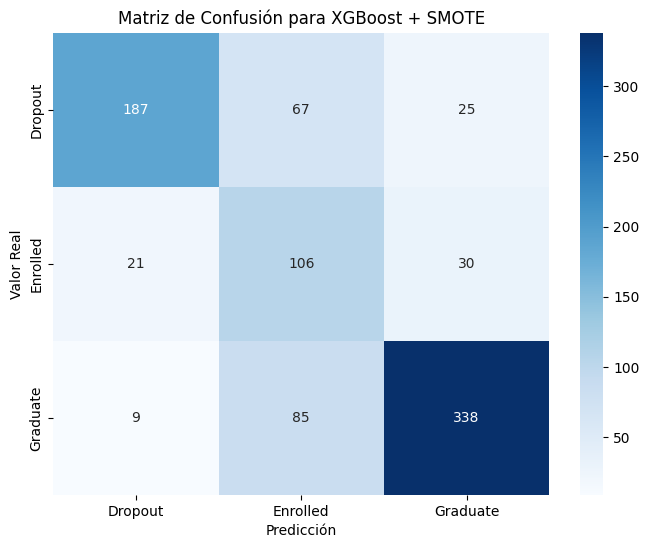

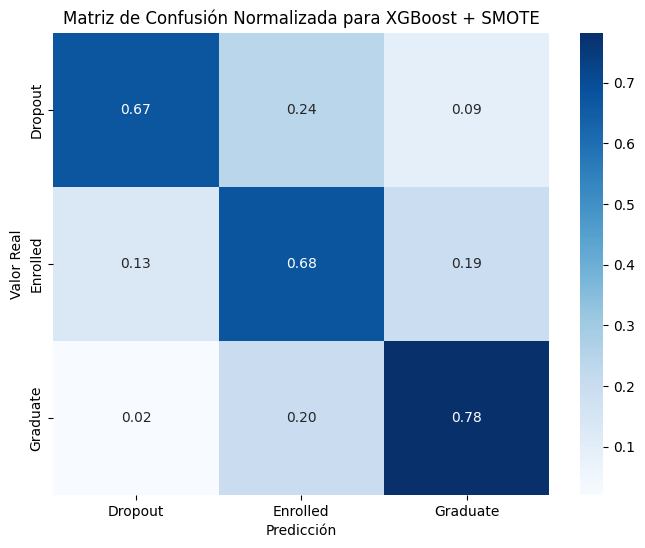

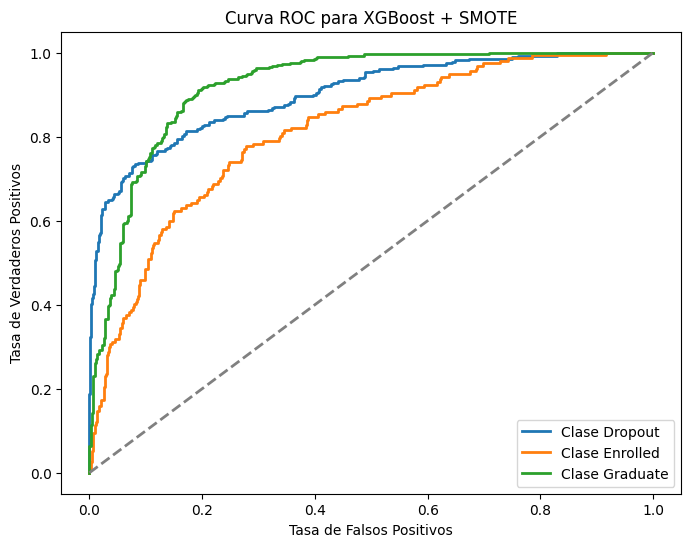

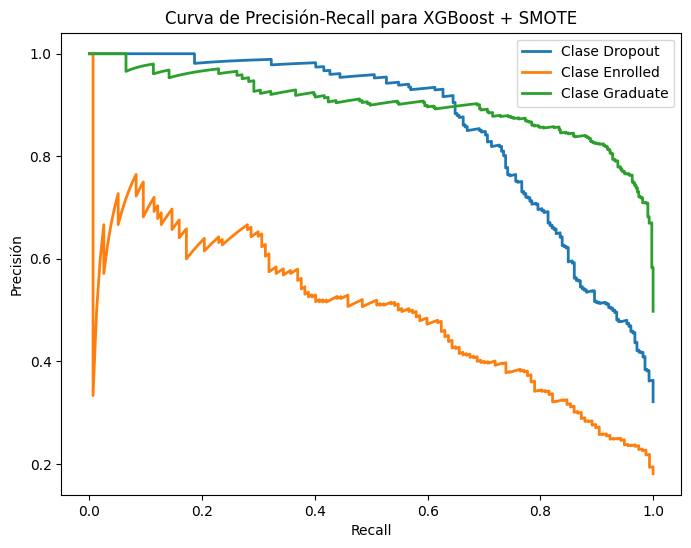

              precision    recall  f1-score   support

     Dropout       0.86      0.67      0.75       279
    Enrolled       0.41      0.68      0.51       157
    Graduate       0.86      0.78      0.82       432

    accuracy                           0.73       868
   macro avg       0.71      0.71      0.69       868
weighted avg       0.78      0.73      0.74       868


Resultados para XGBoost + SMOTE Tomek en el conjunto de prueba:
Accuracy: 0.7327, Recall: 0.7327, F1-score: 0.7473
ROC AUC: 0.8936


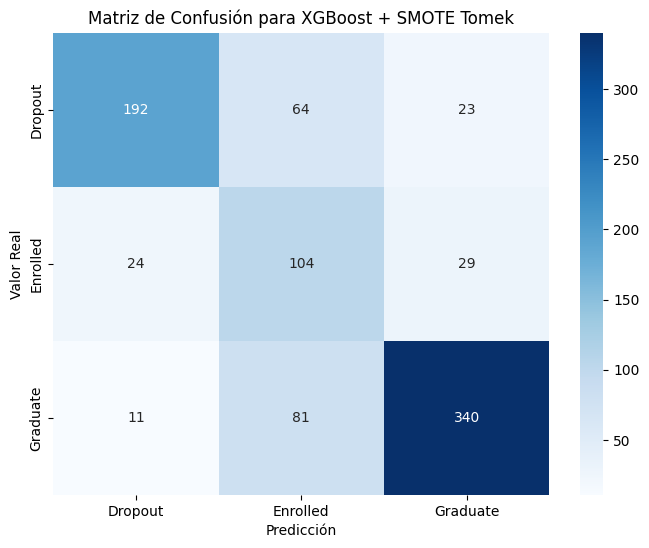

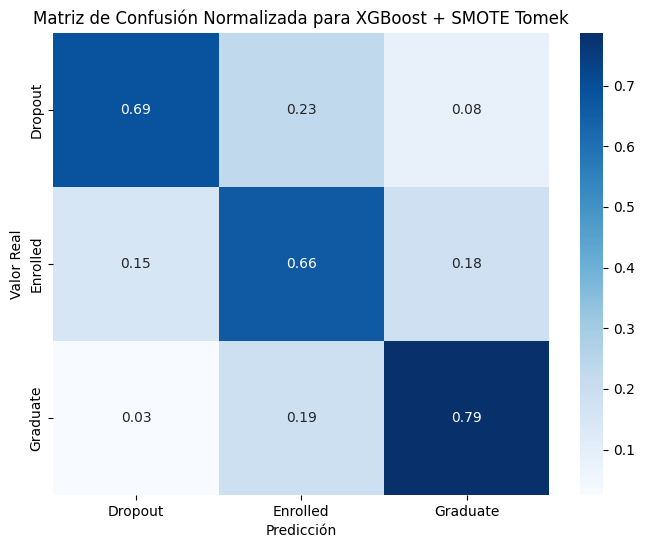

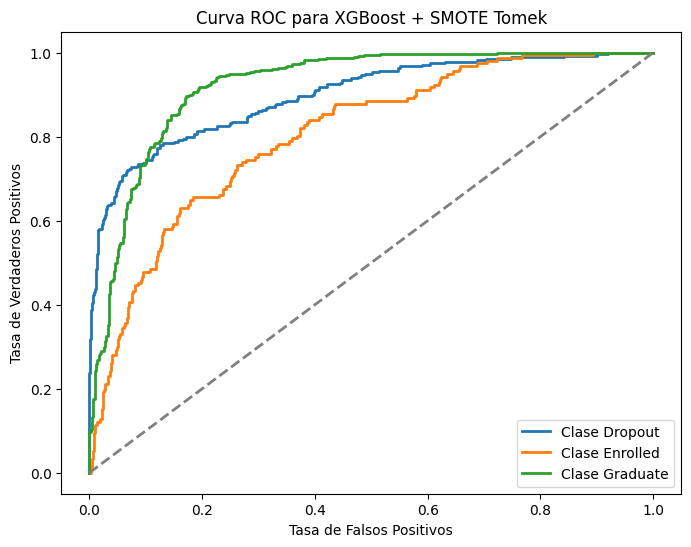

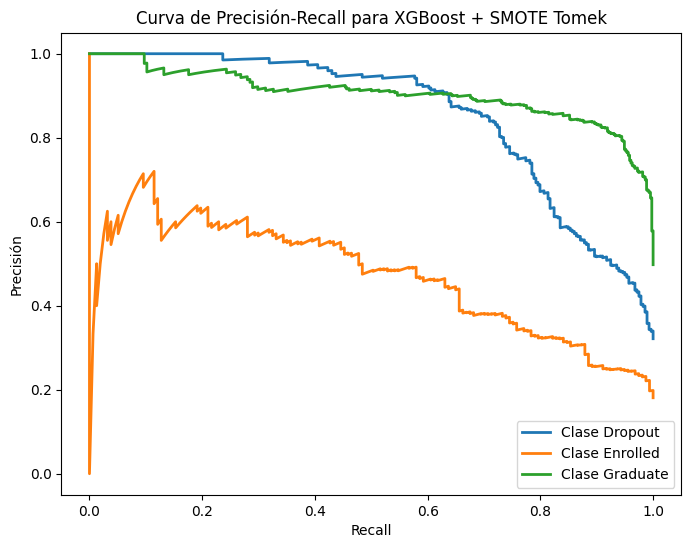

              precision    recall  f1-score   support

     Dropout       0.85      0.69      0.76       279
    Enrolled       0.42      0.66      0.51       157
    Graduate       0.87      0.79      0.83       432

    accuracy                           0.73       868
   macro avg       0.71      0.71      0.70       868
weighted avg       0.78      0.73      0.75       868


Resultados para XGBoost + Random Under Sampler en el conjunto de prueba:
Accuracy: 0.7189, Recall: 0.7189, F1-score: 0.7359
ROC AUC: 0.8945


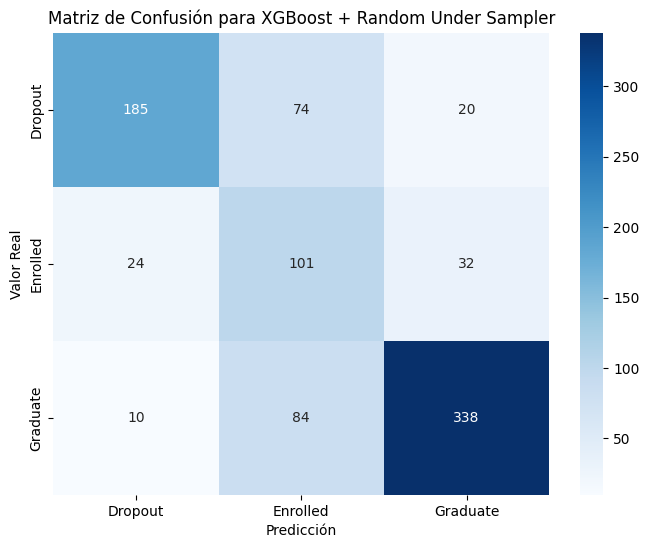

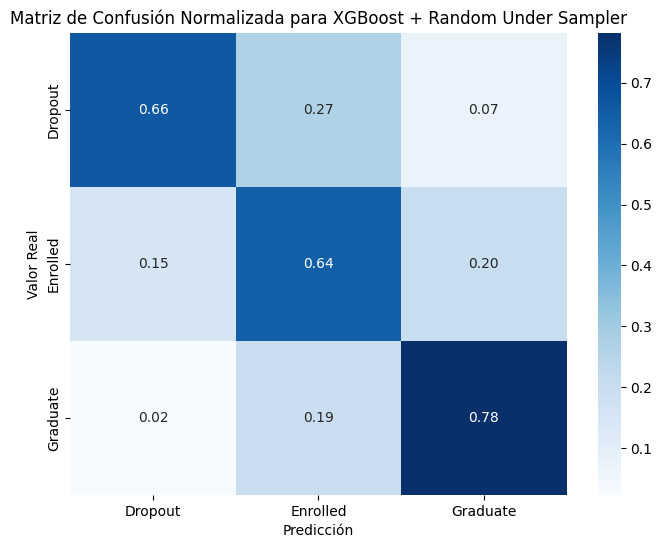

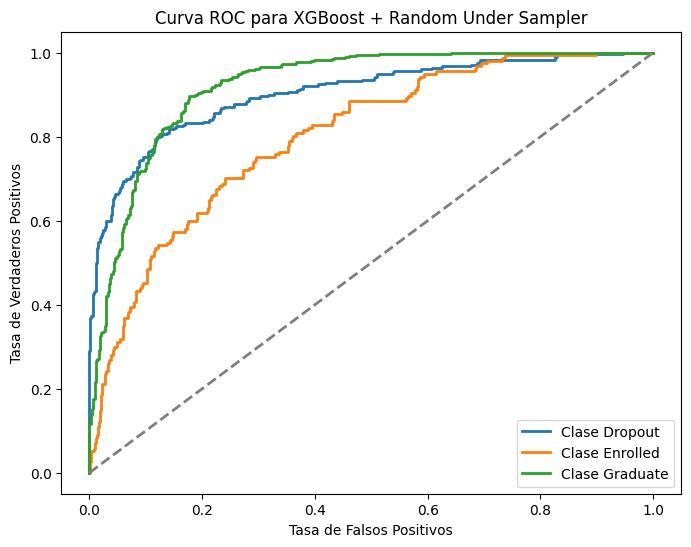

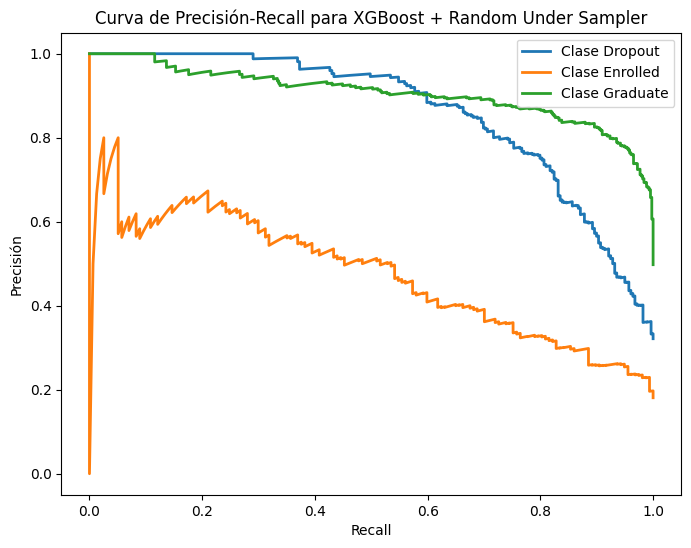

              precision    recall  f1-score   support

     Dropout       0.84      0.66      0.74       279
    Enrolled       0.39      0.64      0.49       157
    Graduate       0.87      0.78      0.82       432

    accuracy                           0.72       868
   macro avg       0.70      0.70      0.68       868
weighted avg       0.77      0.72      0.74       868

[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1653, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

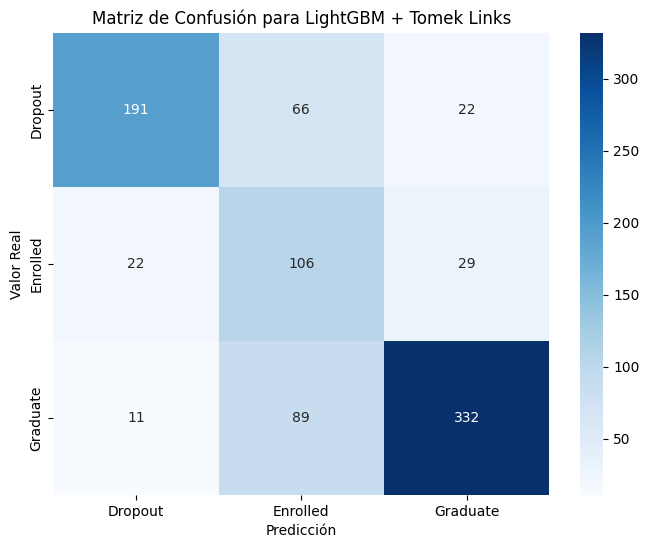

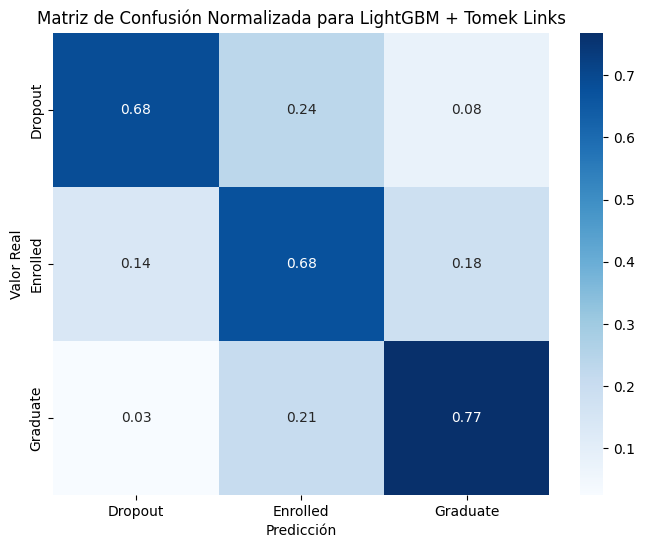

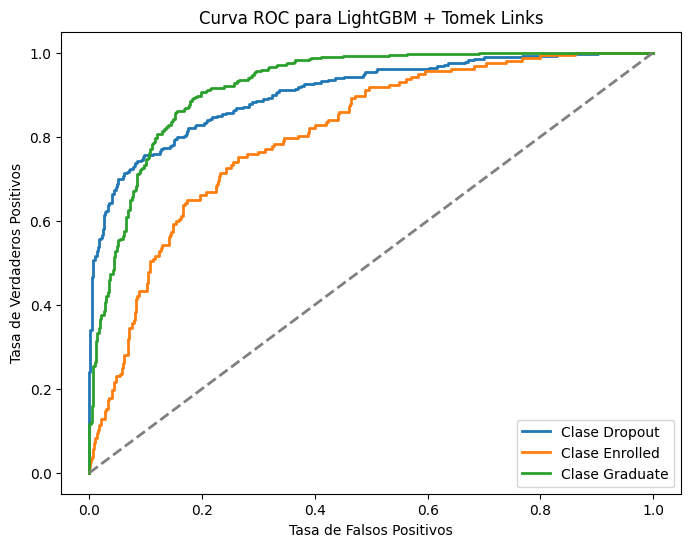

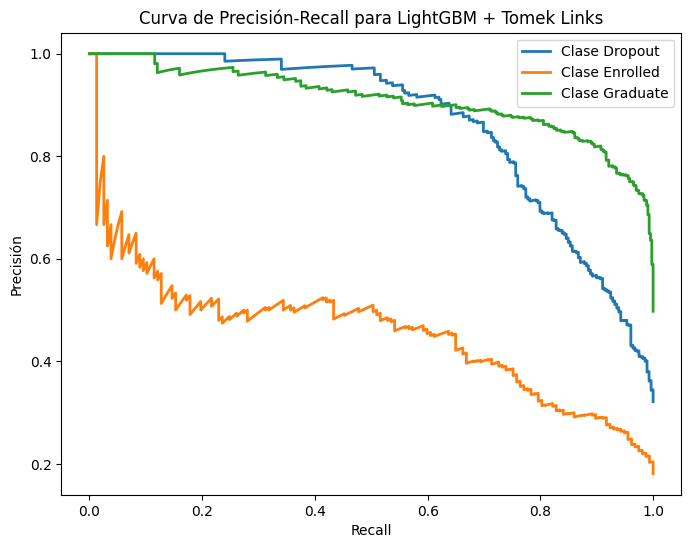

              precision    recall  f1-score   support

     Dropout       0.85      0.68      0.76       279
    Enrolled       0.41      0.68      0.51       157
    Graduate       0.87      0.77      0.81       432

    accuracy                           0.72       868
   macro avg       0.71      0.71      0.69       868
weighted avg       0.78      0.72      0.74       868

[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1653, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

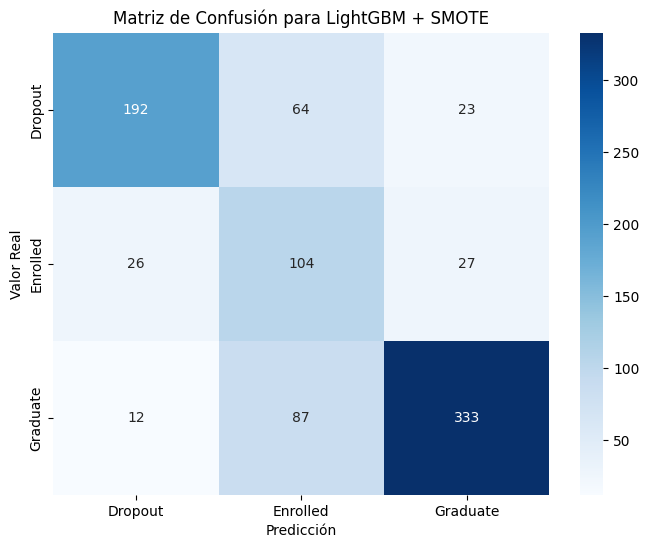

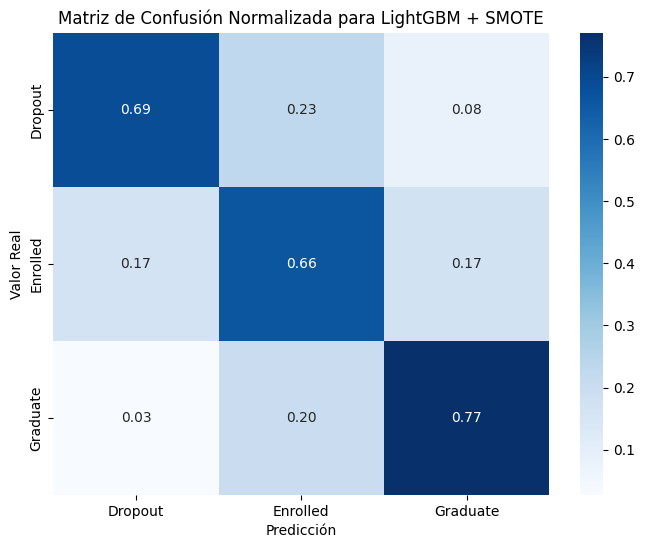

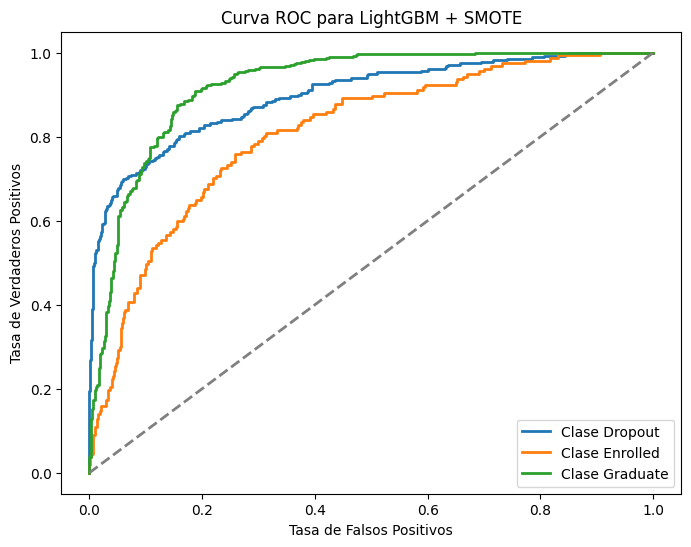

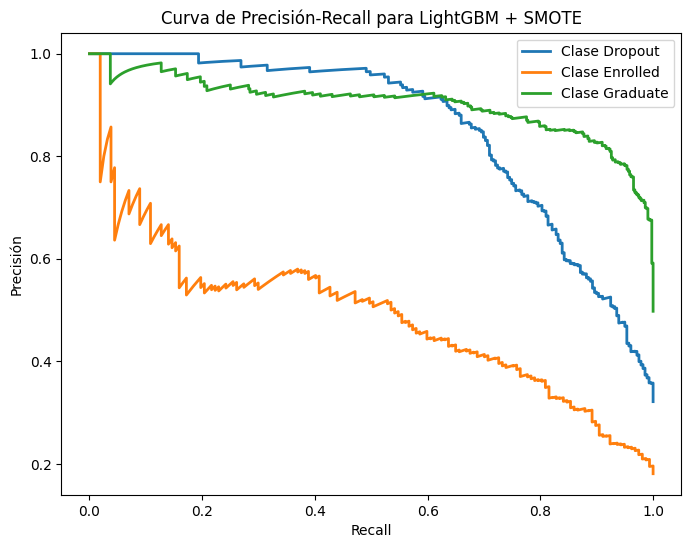

              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       279
    Enrolled       0.41      0.66      0.50       157
    Graduate       0.87      0.77      0.82       432

    accuracy                           0.72       868
   macro avg       0.70      0.71      0.69       868
weighted avg       0.77      0.72      0.74       868

[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1653, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

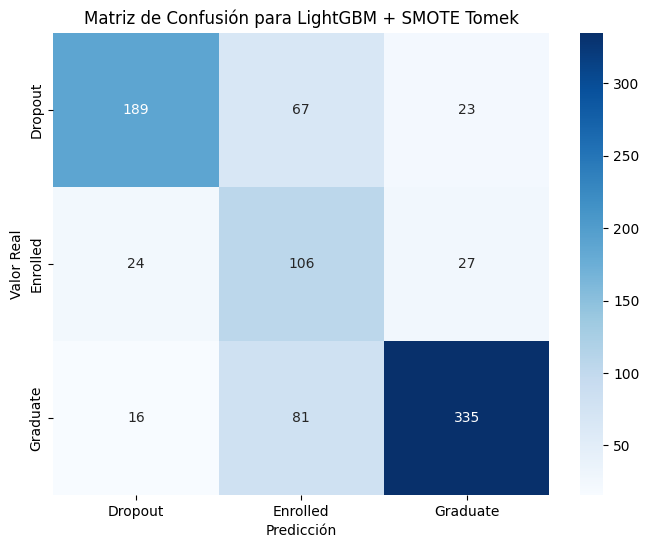

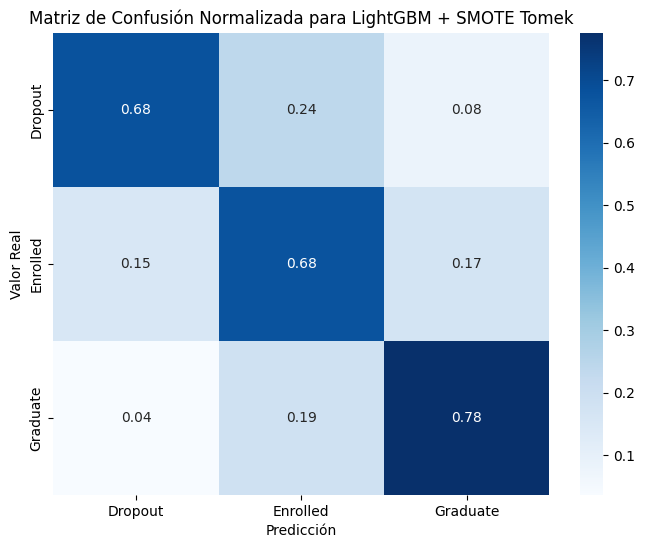

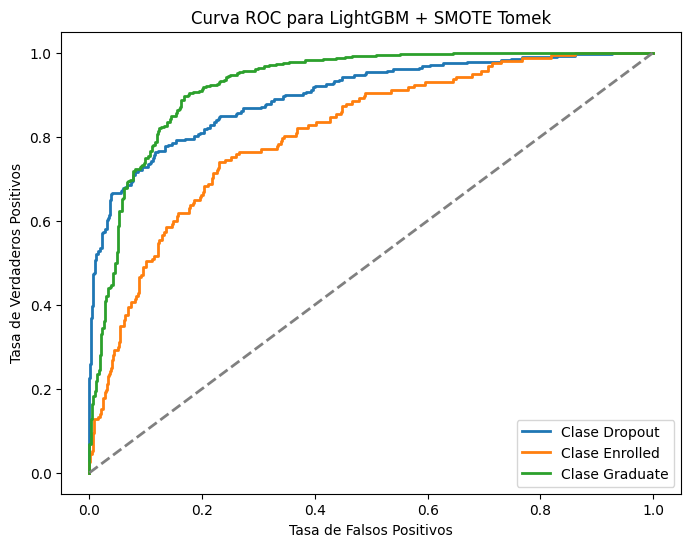

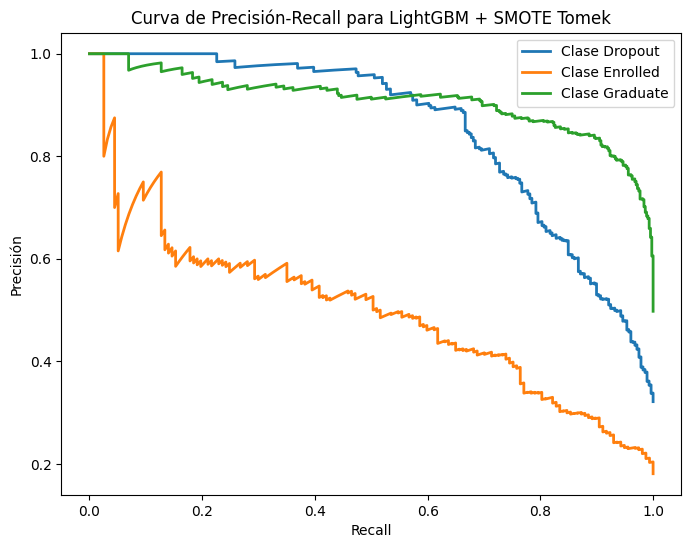

              precision    recall  f1-score   support

     Dropout       0.83      0.68      0.74       279
    Enrolled       0.42      0.68      0.52       157
    Graduate       0.87      0.78      0.82       432

    accuracy                           0.73       868
   macro avg       0.70      0.71      0.69       868
weighted avg       0.77      0.73      0.74       868

[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1653, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

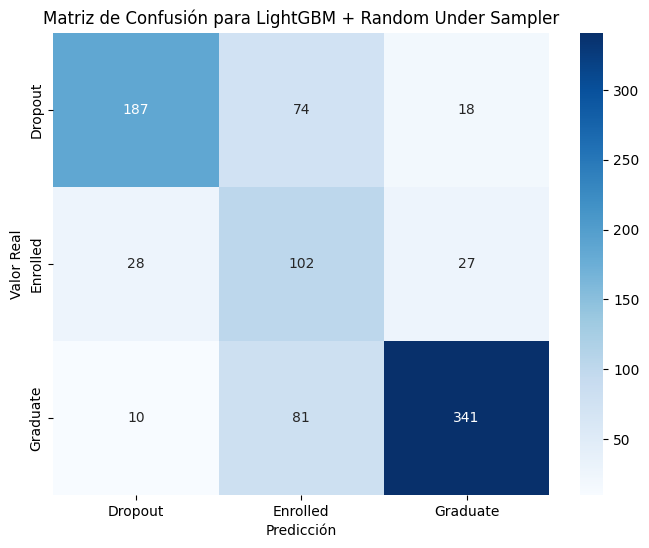

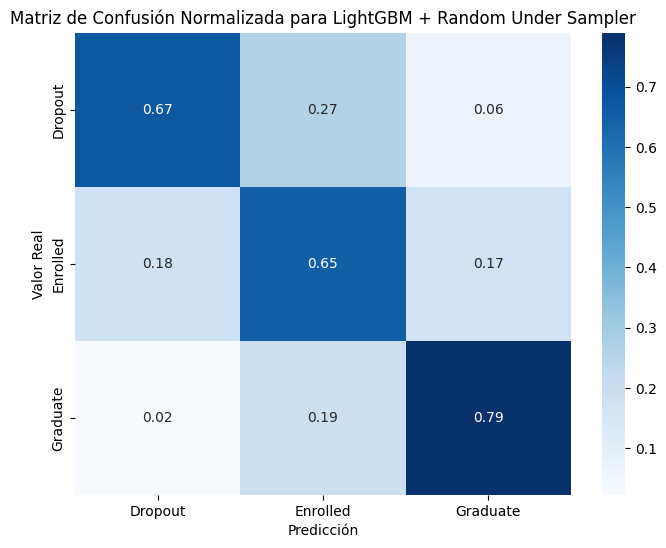

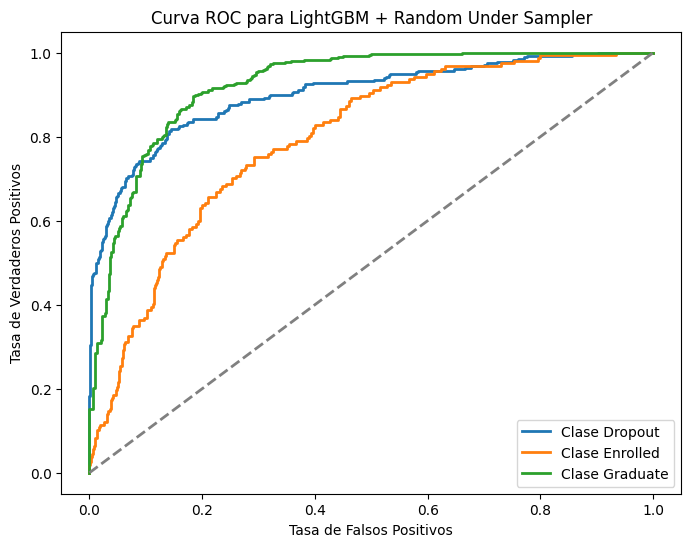

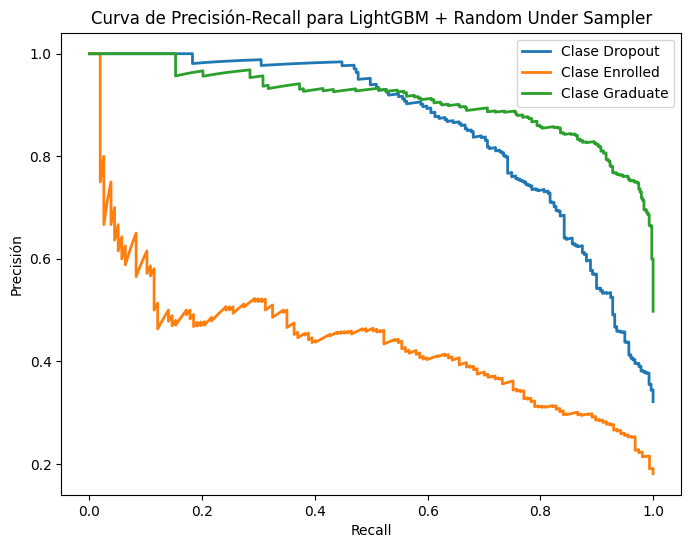

              precision    recall  f1-score   support

     Dropout       0.83      0.67      0.74       279
    Enrolled       0.40      0.65      0.49       157
    Graduate       0.88      0.79      0.83       432

    accuracy                           0.73       868
   macro avg       0.70      0.70      0.69       868
weighted avg       0.78      0.73      0.74       868


Resultados para RandomForest + Tomek Links en el conjunto de prueba:
Accuracy: 0.7247, Recall: 0.7247, F1-score: 0.7423
ROC AUC: 0.8945


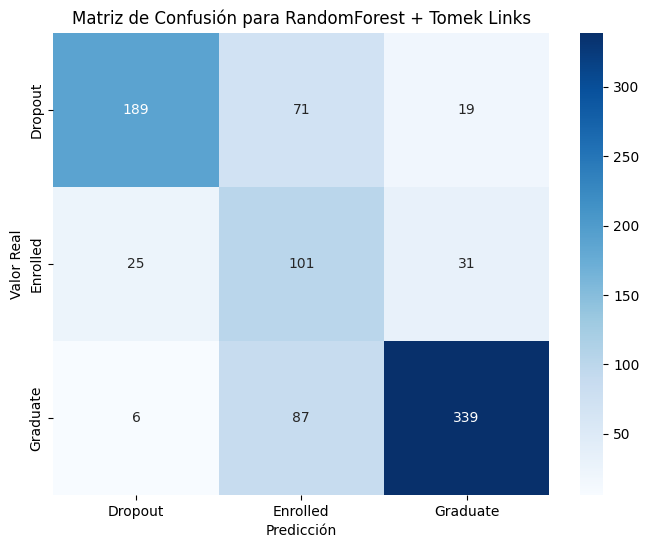

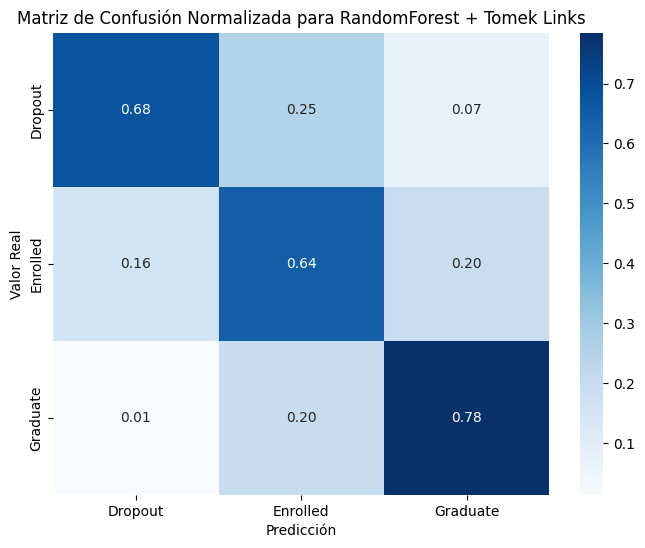

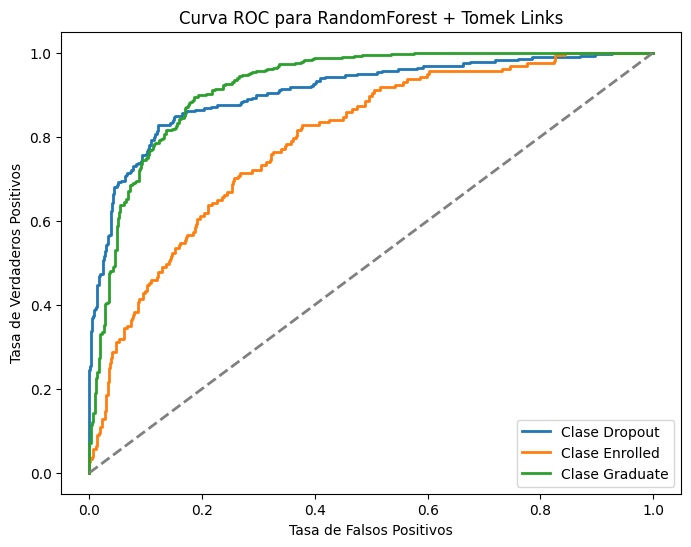

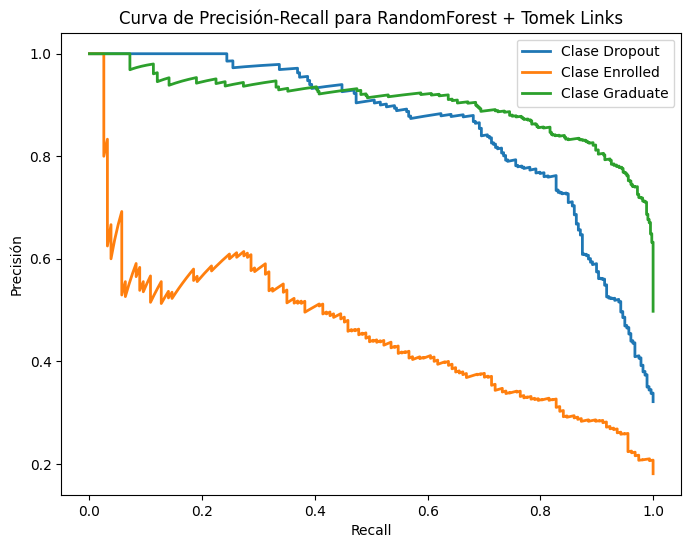

              precision    recall  f1-score   support

     Dropout       0.86      0.68      0.76       279
    Enrolled       0.39      0.64      0.49       157
    Graduate       0.87      0.78      0.83       432

    accuracy                           0.72       868
   macro avg       0.71      0.70      0.69       868
weighted avg       0.78      0.72      0.74       868


Resultados para RandomForest + SMOTE en el conjunto de prueba:
Accuracy: 0.7212, Recall: 0.7212, F1-score: 0.7387
ROC AUC: 0.8886


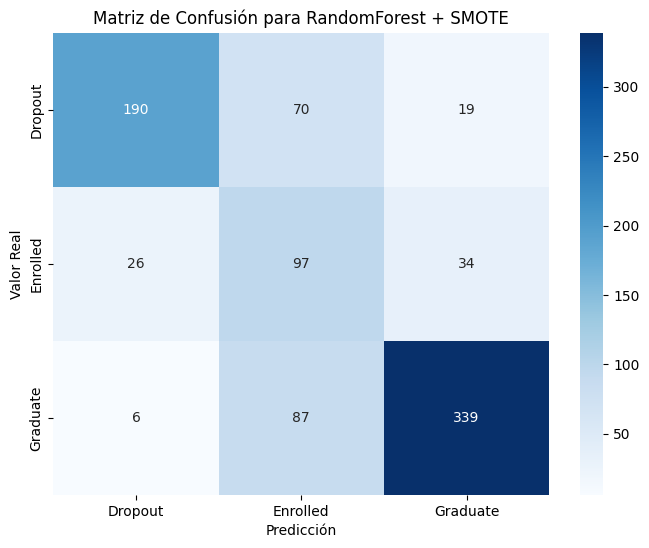

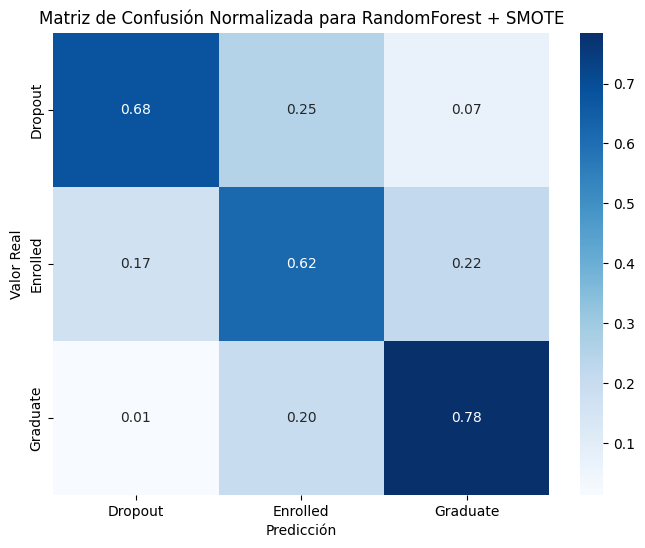

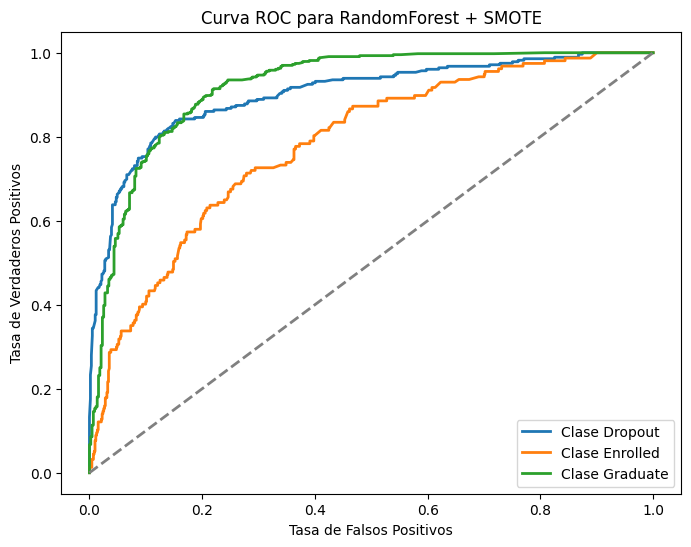

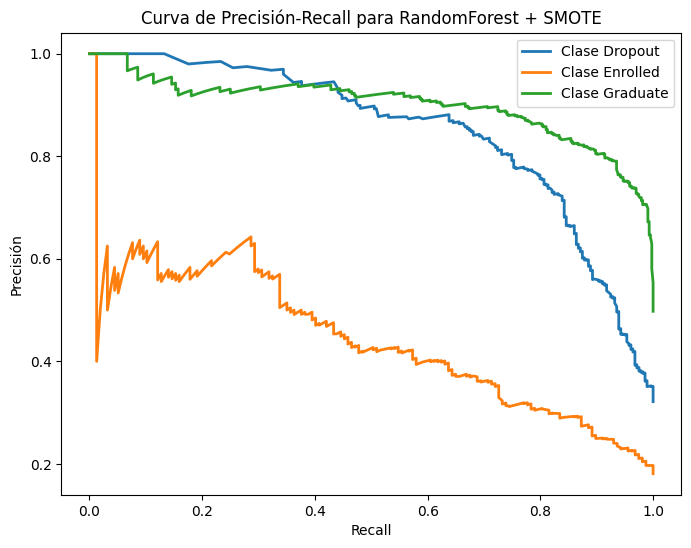

              precision    recall  f1-score   support

     Dropout       0.86      0.68      0.76       279
    Enrolled       0.38      0.62      0.47       157
    Graduate       0.86      0.78      0.82       432

    accuracy                           0.72       868
   macro avg       0.70      0.69      0.68       868
weighted avg       0.77      0.72      0.74       868


Resultados para RandomForest + SMOTE Tomek en el conjunto de prueba:
Accuracy: 0.7224, Recall: 0.7224, F1-score: 0.7395
ROC AUC: 0.8928


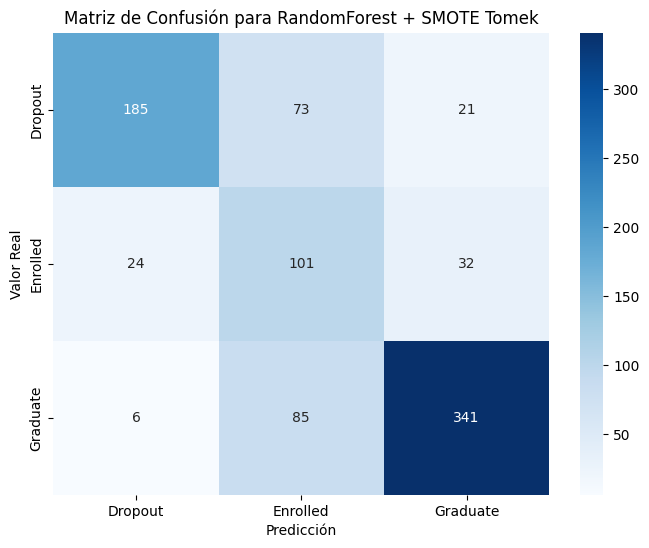

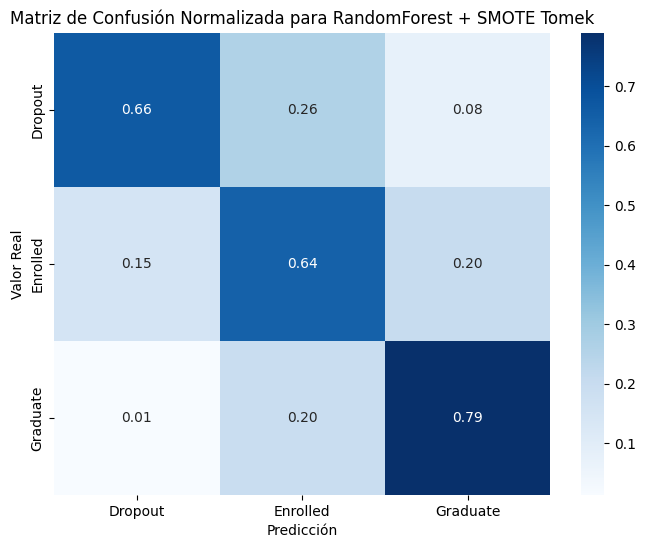

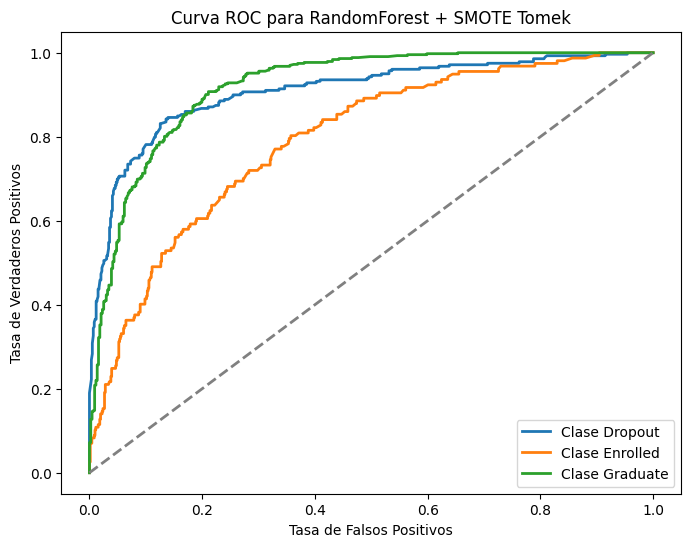

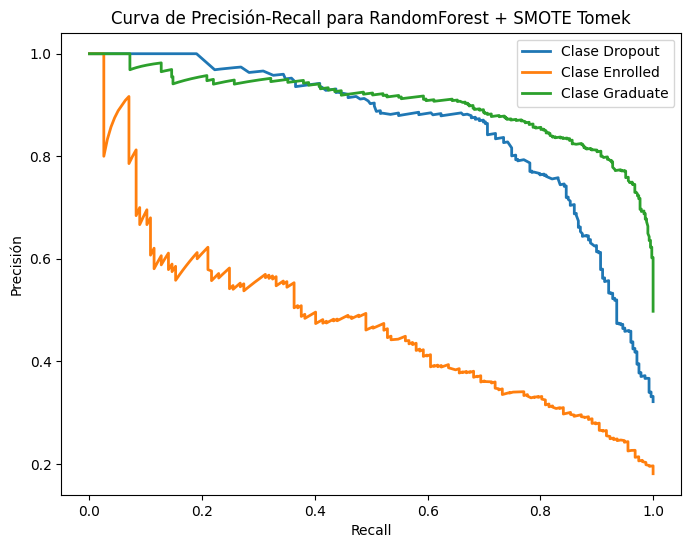

              precision    recall  f1-score   support

     Dropout       0.86      0.66      0.75       279
    Enrolled       0.39      0.64      0.49       157
    Graduate       0.87      0.79      0.83       432

    accuracy                           0.72       868
   macro avg       0.71      0.70      0.69       868
weighted avg       0.78      0.72      0.74       868


Resultados para RandomForest + Random Under Sampler en el conjunto de prueba:
Accuracy: 0.7235, Recall: 0.7235, F1-score: 0.7403
ROC AUC: 0.8948


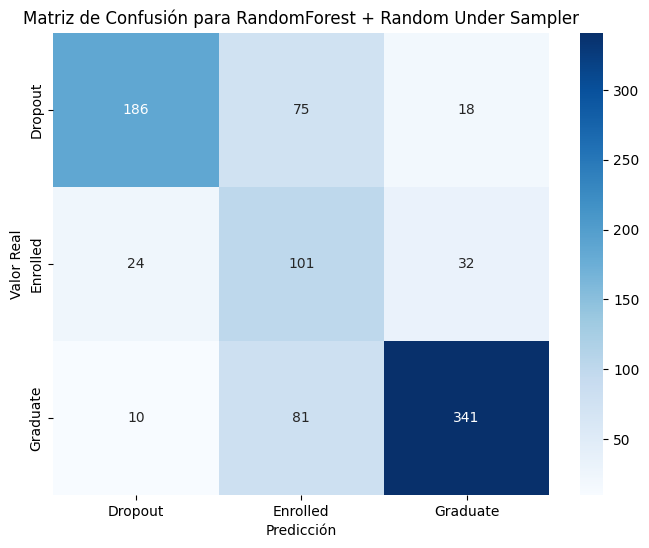

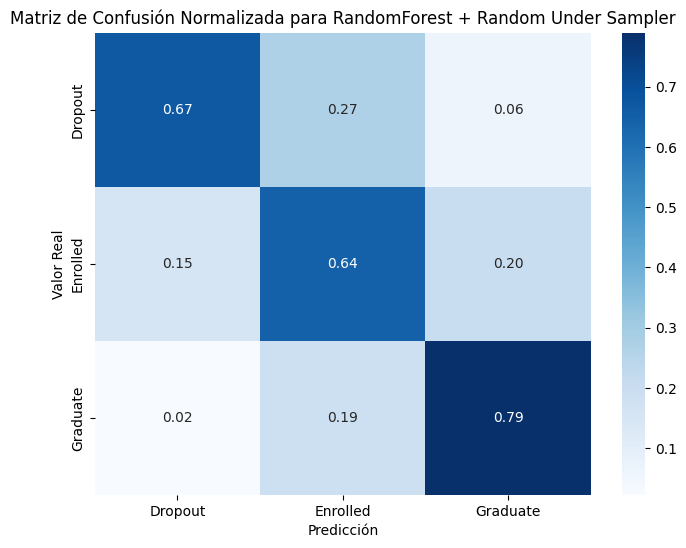

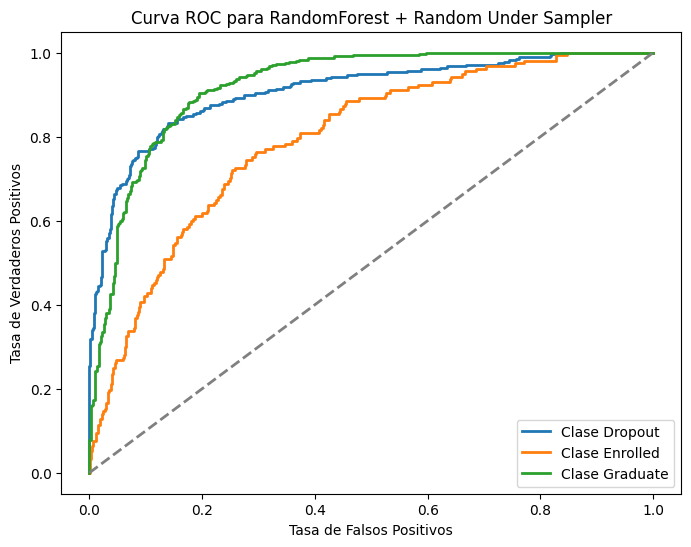

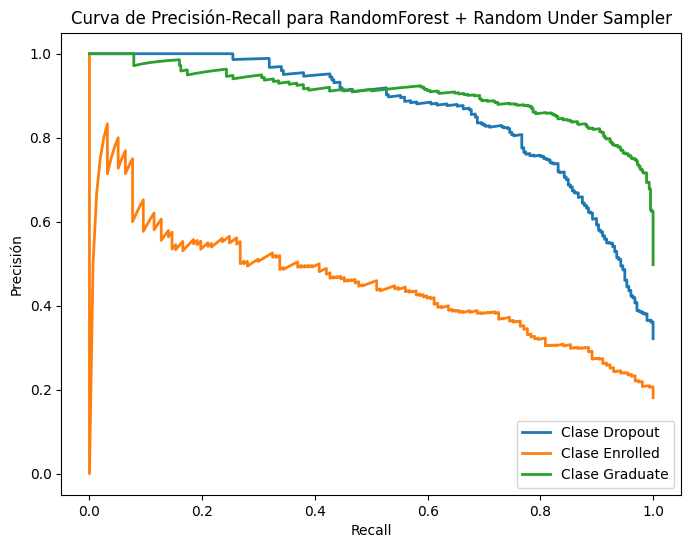

              precision    recall  f1-score   support

     Dropout       0.85      0.67      0.75       279
    Enrolled       0.39      0.64      0.49       157
    Graduate       0.87      0.79      0.83       432

    accuracy                           0.72       868
   macro avg       0.70      0.70      0.69       868
weighted avg       0.78      0.72      0.74       868


Resultados para DecisionTree + Tomek Links en el conjunto de prueba:
Accuracy: 0.6348, Recall: 0.6348, F1-score: 0.6584
ROC AUC: 0.8025


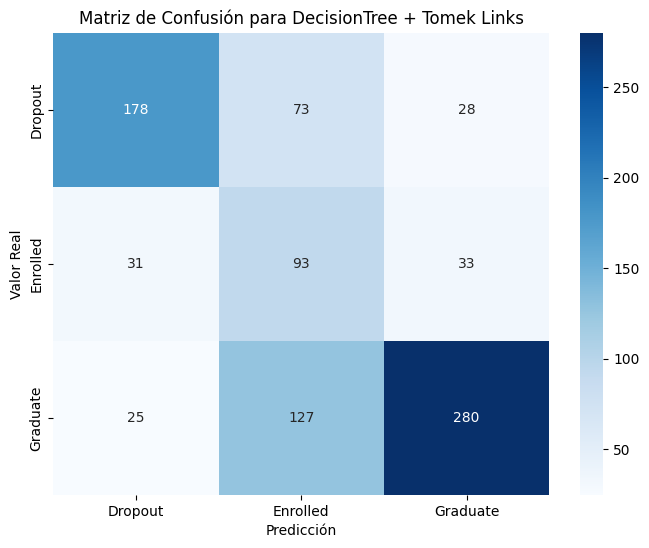

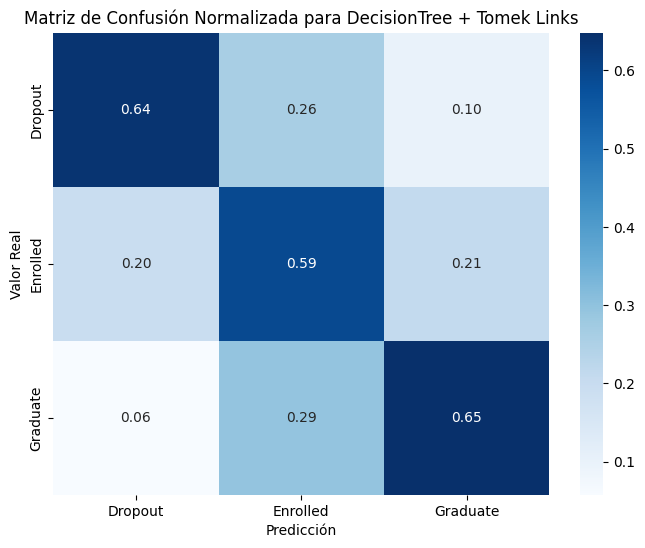

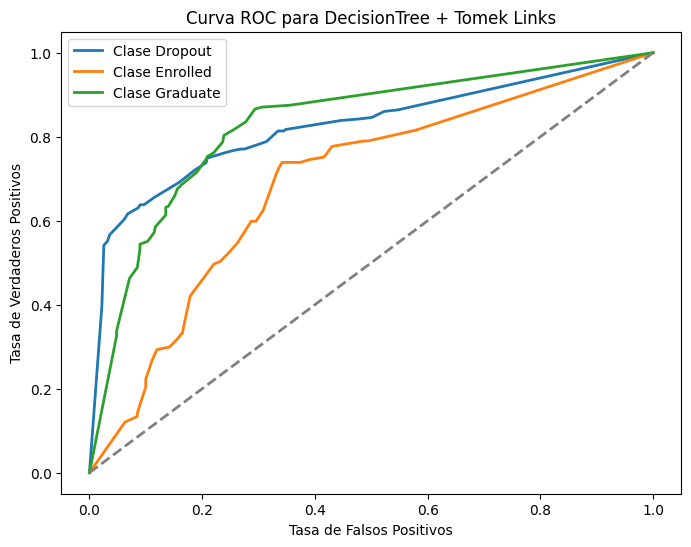

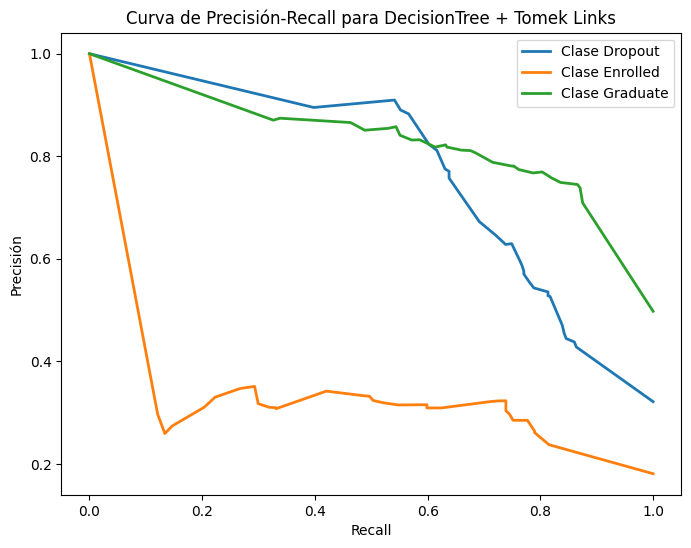

              precision    recall  f1-score   support

     Dropout       0.76      0.64      0.69       279
    Enrolled       0.32      0.59      0.41       157
    Graduate       0.82      0.65      0.72       432

    accuracy                           0.63       868
   macro avg       0.63      0.63      0.61       868
weighted avg       0.71      0.63      0.66       868


Resultados para DecisionTree + SMOTE en el conjunto de prueba:
Accuracy: 0.6290, Recall: 0.6290, F1-score: 0.6482
ROC AUC: 0.7408


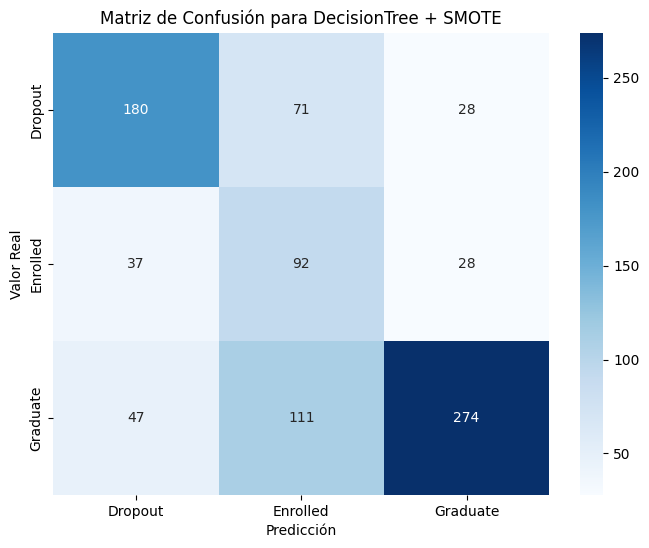

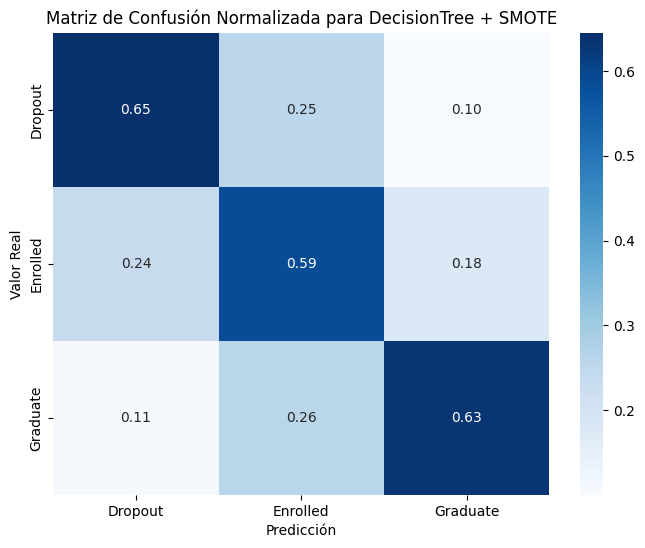

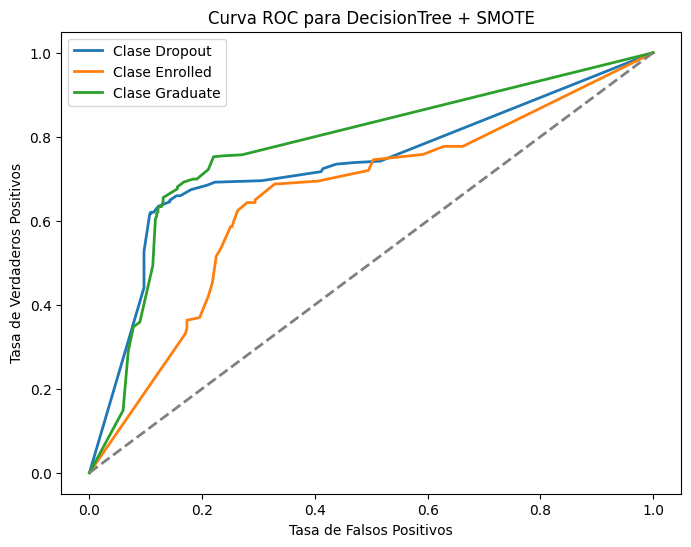

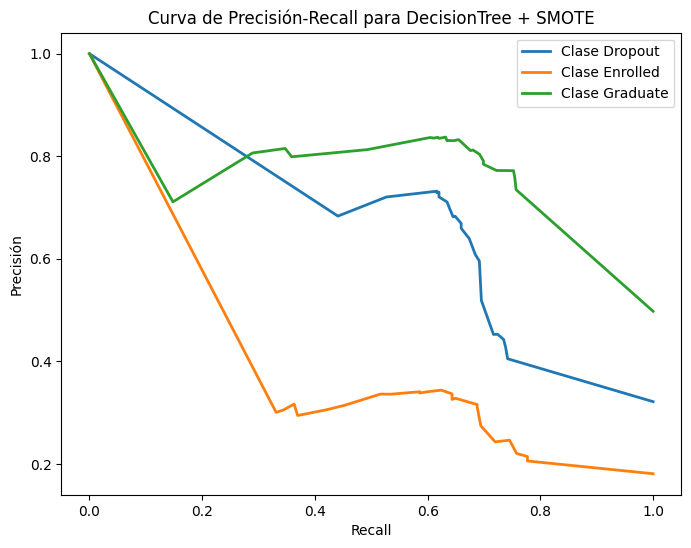

              precision    recall  f1-score   support

     Dropout       0.68      0.65      0.66       279
    Enrolled       0.34      0.59      0.43       157
    Graduate       0.83      0.63      0.72       432

    accuracy                           0.63       868
   macro avg       0.62      0.62      0.60       868
weighted avg       0.69      0.63      0.65       868


Resultados para DecisionTree + SMOTE Tomek en el conjunto de prueba:
Accuracy: 0.6417, Recall: 0.6417, F1-score: 0.6616
ROC AUC: 0.7517


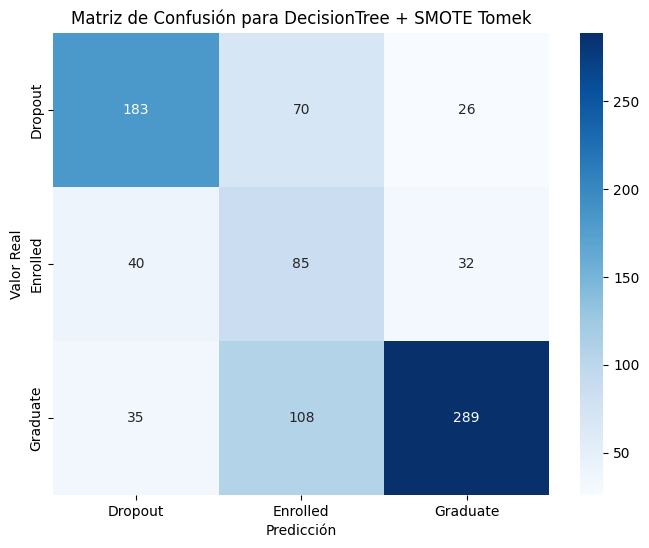

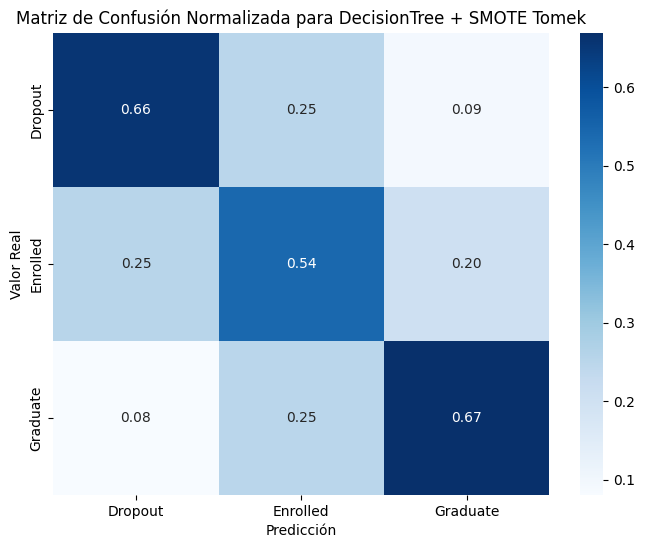

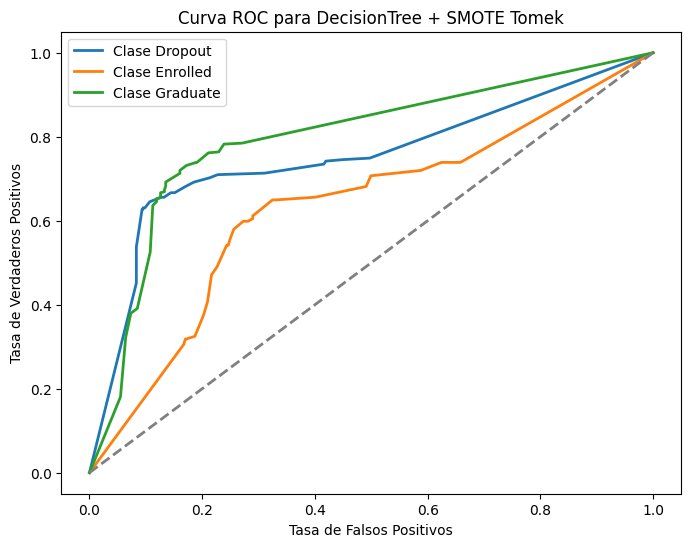

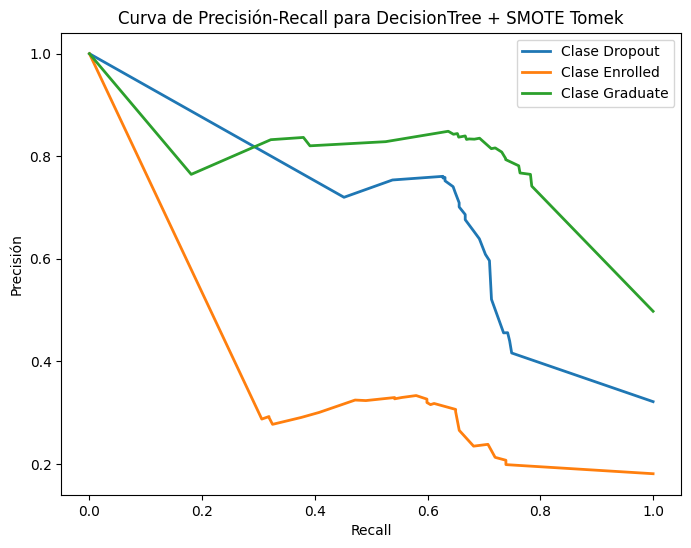

              precision    recall  f1-score   support

     Dropout       0.71      0.66      0.68       279
    Enrolled       0.32      0.54      0.40       157
    Graduate       0.83      0.67      0.74       432

    accuracy                           0.64       868
   macro avg       0.62      0.62      0.61       868
weighted avg       0.70      0.64      0.66       868


Resultados para DecisionTree + Random Under Sampler en el conjunto de prueba:
Accuracy: 0.6325, Recall: 0.6325, F1-score: 0.6564
ROC AUC: 0.7971


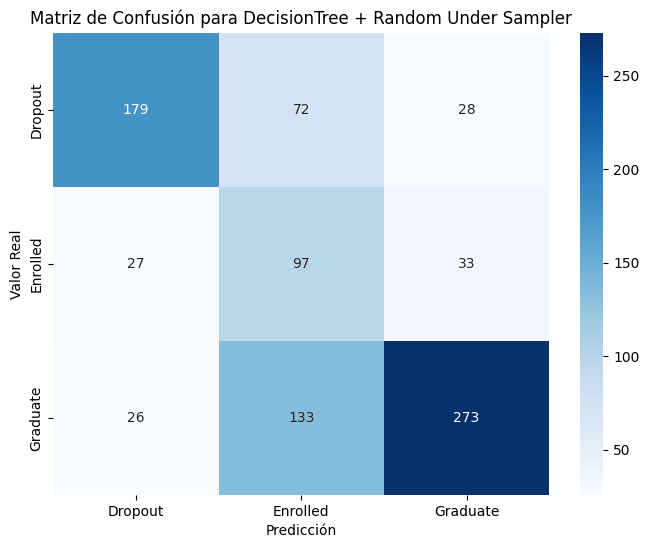

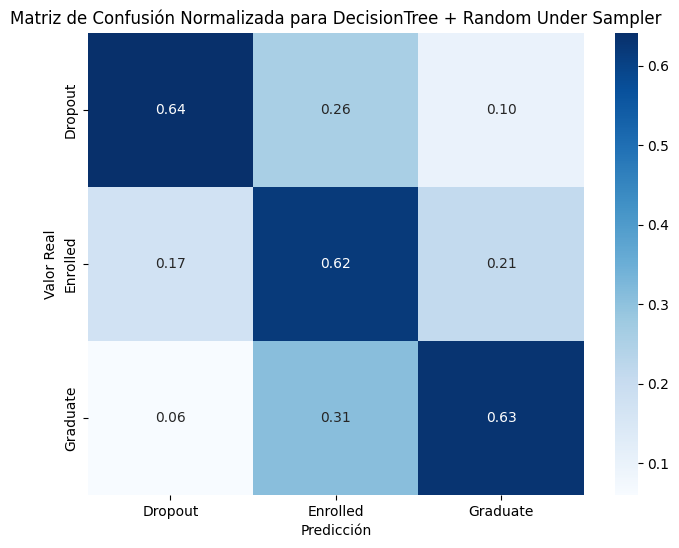

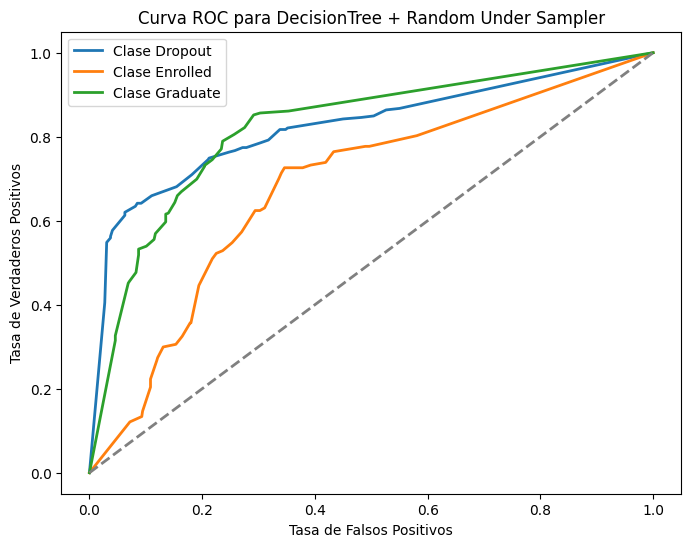

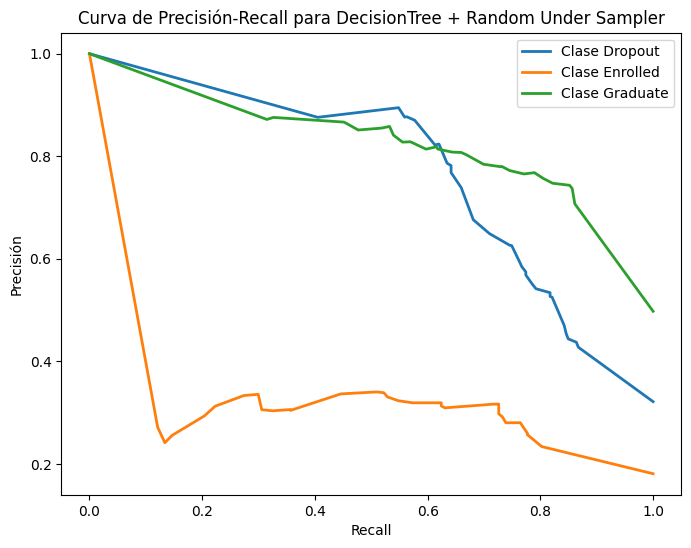

              precision    recall  f1-score   support

     Dropout       0.77      0.64      0.70       279
    Enrolled       0.32      0.62      0.42       157
    Graduate       0.82      0.63      0.71       432

    accuracy                           0.63       868
   macro avg       0.64      0.63      0.61       868
weighted avg       0.71      0.63      0.66       868



c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Resultados para AdaBoost + Tomek Links en el conjunto de prueba:
Accuracy: 0.7005, Recall: 0.7005, F1-score: 0.7198
ROC AUC: 0.8719


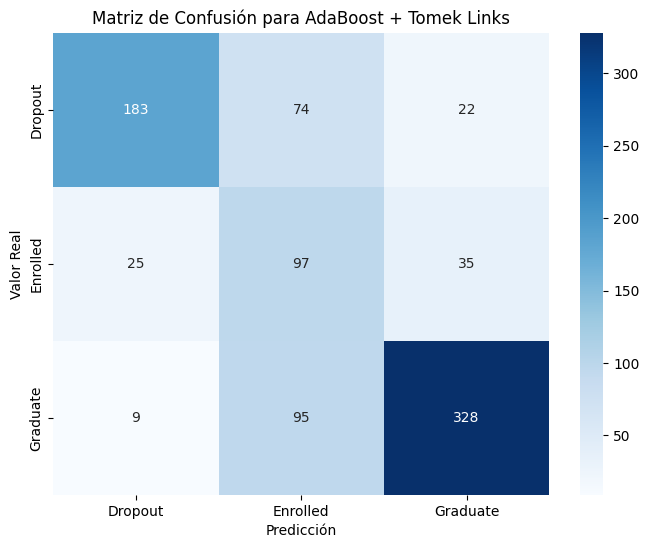

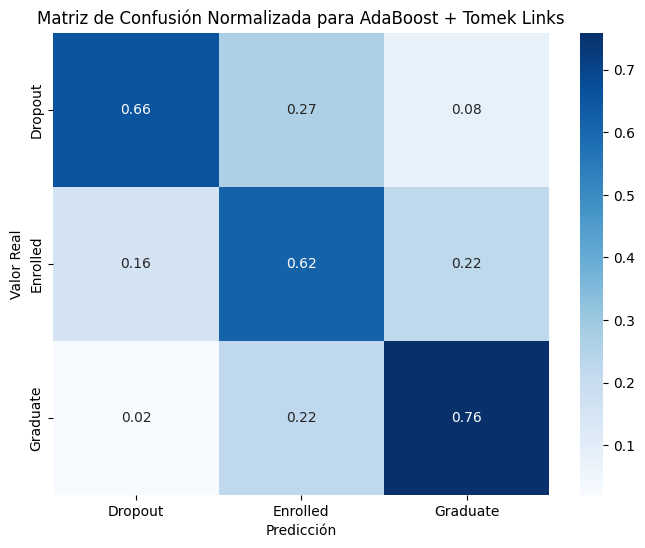

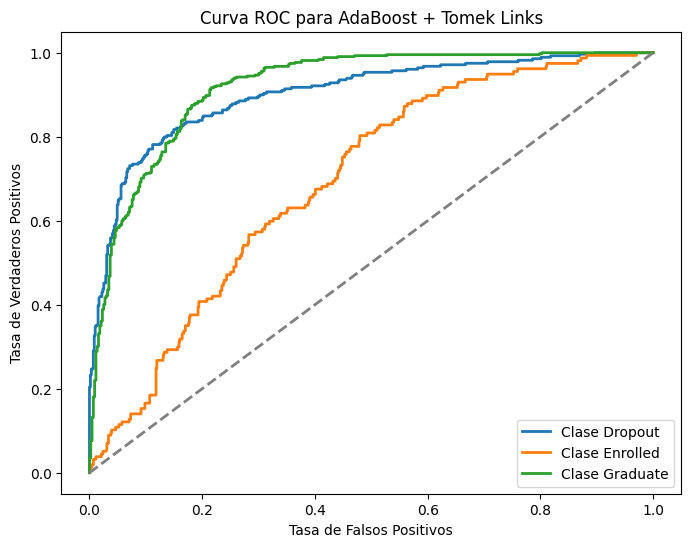

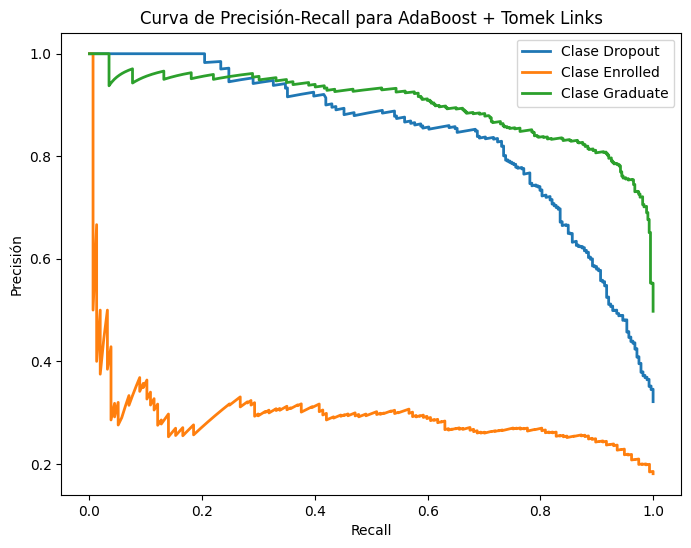

              precision    recall  f1-score   support

     Dropout       0.84      0.66      0.74       279
    Enrolled       0.36      0.62      0.46       157
    Graduate       0.85      0.76      0.80       432

    accuracy                           0.70       868
   macro avg       0.69      0.68      0.67       868
weighted avg       0.76      0.70      0.72       868



c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Resultados para AdaBoost + SMOTE en el conjunto de prueba:
Accuracy: 0.6982, Recall: 0.6982, F1-score: 0.7161
ROC AUC: 0.8619


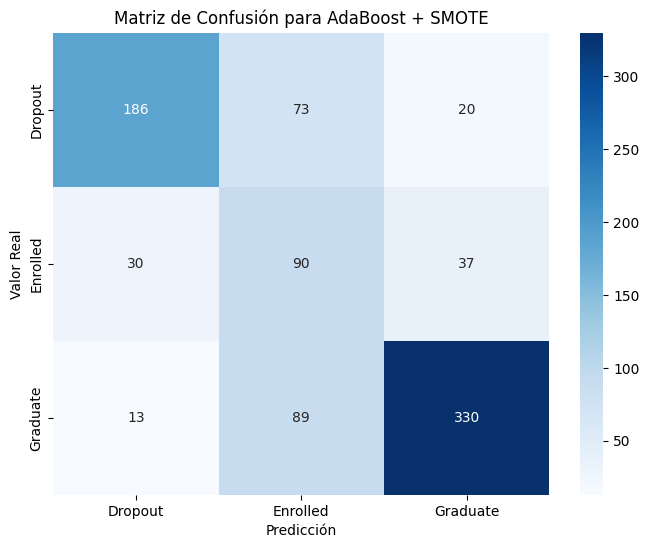

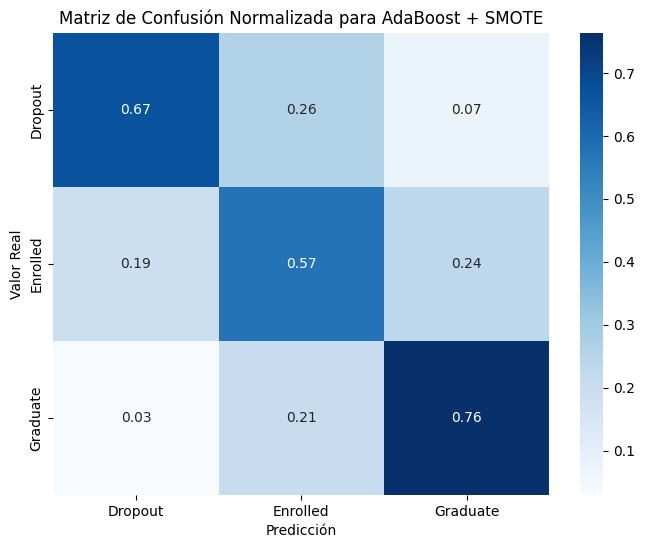

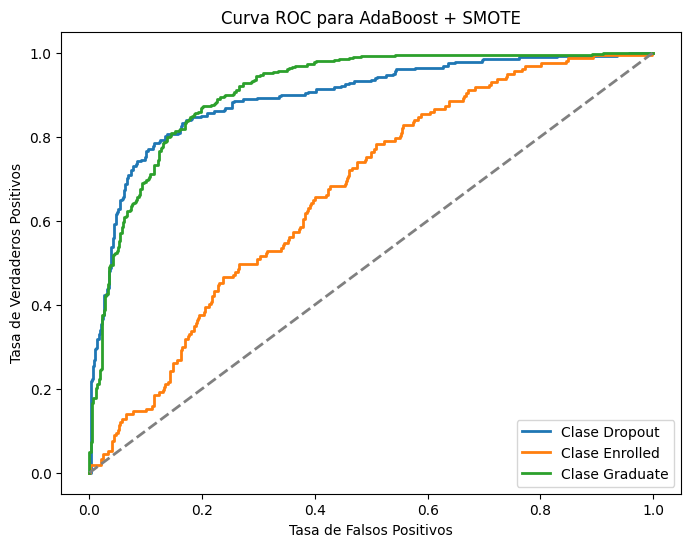

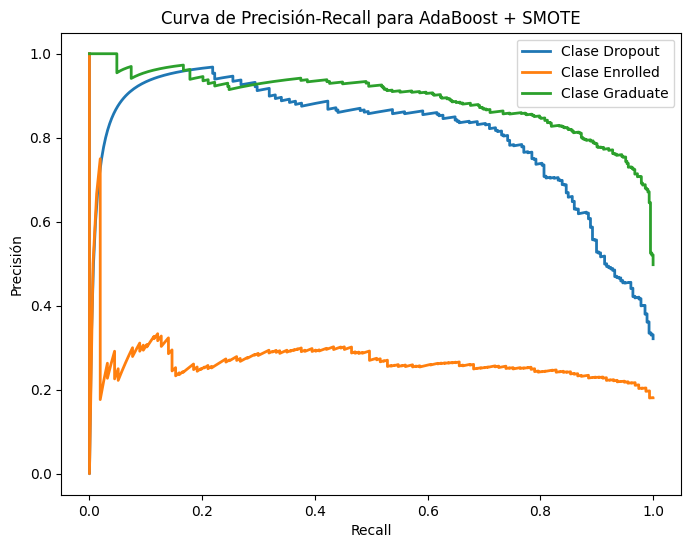

              precision    recall  f1-score   support

     Dropout       0.81      0.67      0.73       279
    Enrolled       0.36      0.57      0.44       157
    Graduate       0.85      0.76      0.81       432

    accuracy                           0.70       868
   macro avg       0.67      0.67      0.66       868
weighted avg       0.75      0.70      0.72       868



c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Resultados para AdaBoost + SMOTE Tomek en el conjunto de prueba:
Accuracy: 0.7062, Recall: 0.7062, F1-score: 0.7219
ROC AUC: 0.8650


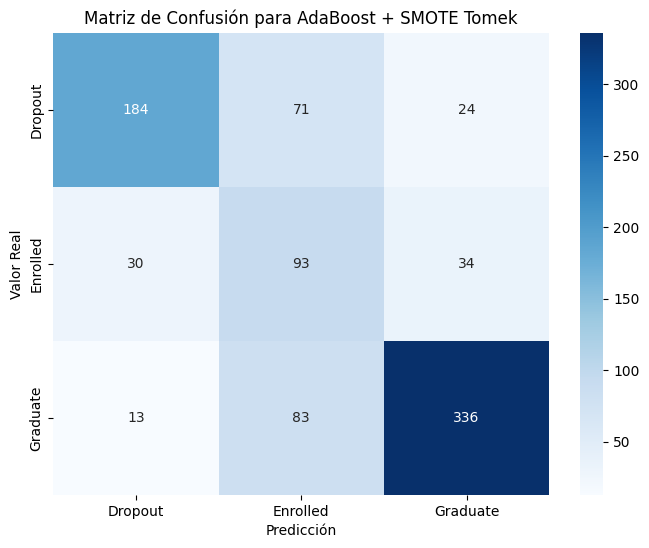

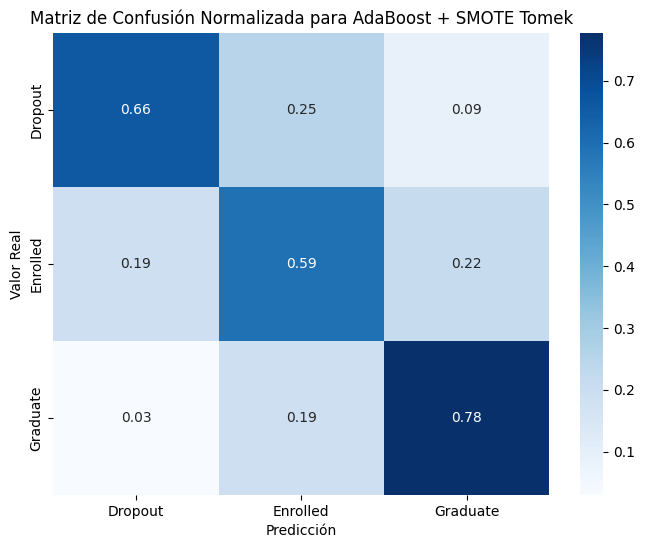

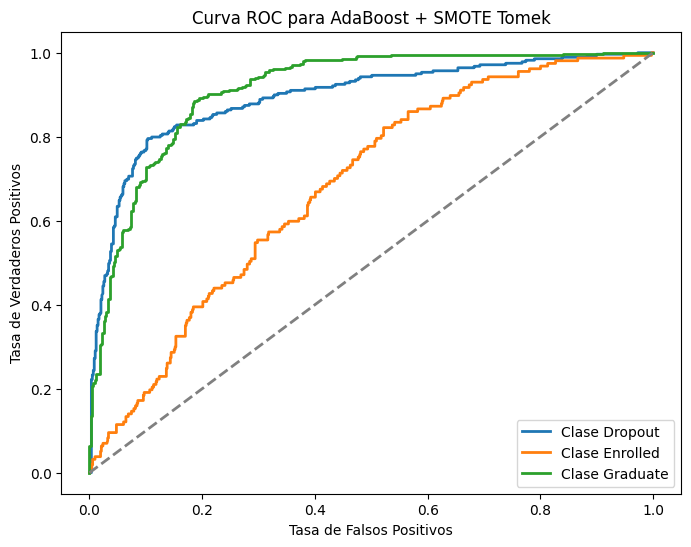

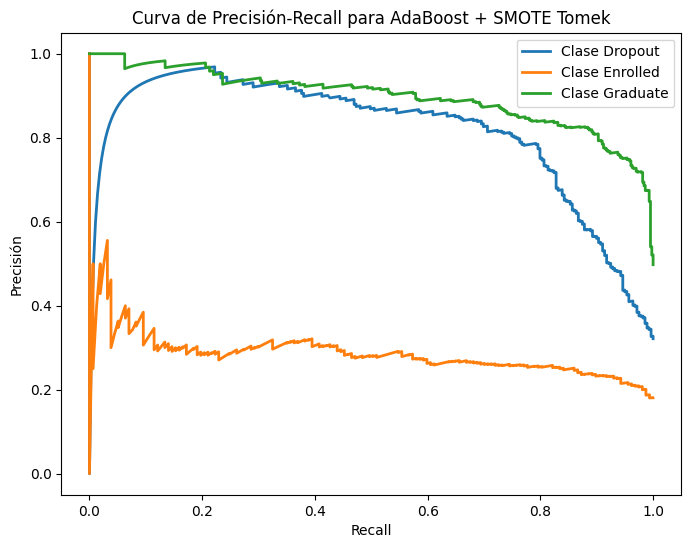

              precision    recall  f1-score   support

     Dropout       0.81      0.66      0.73       279
    Enrolled       0.38      0.59      0.46       157
    Graduate       0.85      0.78      0.81       432

    accuracy                           0.71       868
   macro avg       0.68      0.68      0.67       868
weighted avg       0.75      0.71      0.72       868


Resultados para AdaBoost + Random Under Sampler en el conjunto de prueba:
Accuracy: 0.7051, Recall: 0.7051, F1-score: 0.7210
ROC AUC: 0.8746


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


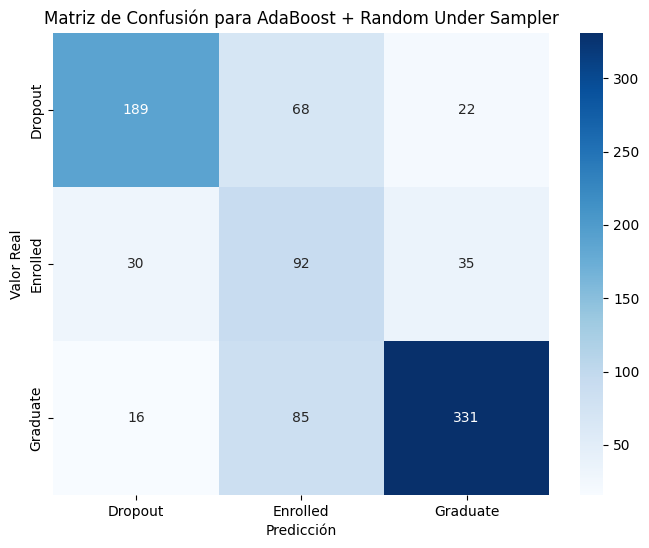

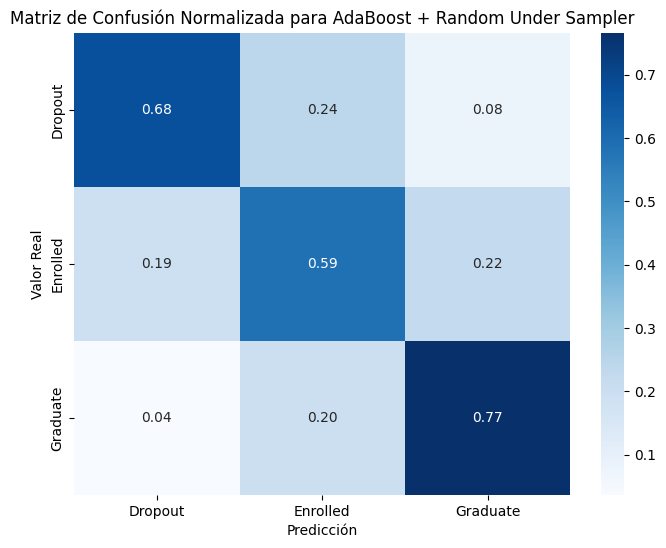

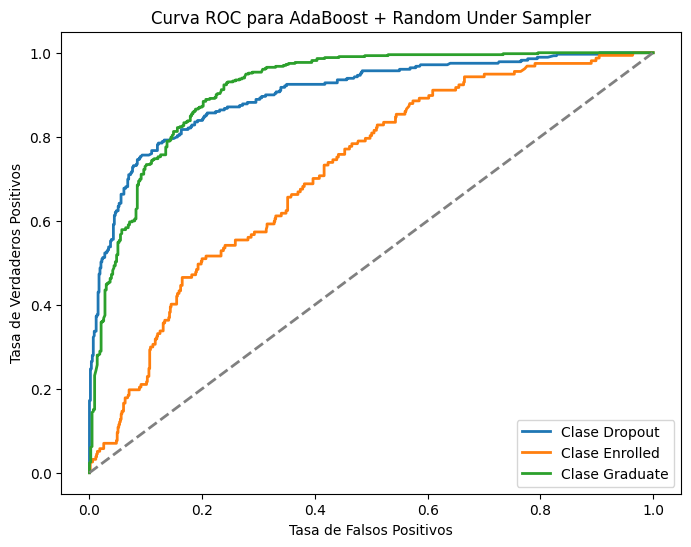

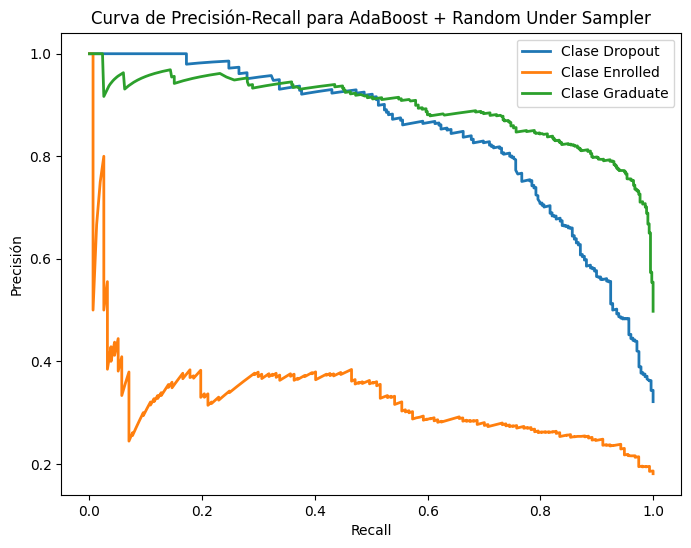

              precision    recall  f1-score   support

     Dropout       0.80      0.68      0.74       279
    Enrolled       0.38      0.59      0.46       157
    Graduate       0.85      0.77      0.81       432

    accuracy                           0.71       868
   macro avg       0.68      0.68      0.67       868
weighted avg       0.75      0.71      0.72       868



In [13]:
# Paso 9: Evaluar cada combinación de modelo y técnica de remuestreo en el conjunto de prueba
for model_name, resampling_results in model_results.items():
    for resampling_name, info in resampling_results.items():
        model = info['model']
        
        # Entrenar el modelo con los datos remuestreados
        model.fit(X_resampled, y_resampled)
        
        # Predecir en el conjunto de prueba
        y_test_pred = model.predict(X_test_features)
        
        # Evaluar el rendimiento en el conjunto de prueba
        test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
        test_recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')
        
        print(f"\nResultados para {model_name} + {resampling_name} en el conjunto de prueba:")
        print(f"Accuracy: {test_accuracy:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")
        
        # Calcular el ROC AUC si es aplicable
        if hasattr(model, "predict_proba"):
            y_test_prob = model.predict_proba(X_test_features)
            roc_auc = roc_auc_score(y_test_encoded, y_test_prob, average='weighted', multi_class='ovr')
            print(f"ROC AUC: {roc_auc:.4f}")
        
        # Mostrar la matriz de confusión
        matriz_confusion = confusion_matrix(y_test_encoded, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f'Matriz de Confusión para {model_name} + {resampling_name}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.show()

        # Matriz de confusión normalizada
        matriz_confusion_normalizada = matriz_confusion.astype('float') / matriz_confusion.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion_normalizada, annot=True, cmap="Blues", fmt=".2f", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f'Matriz de Confusión Normalizada para {model_name} + {resampling_name}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.show()

        # Curva ROC para cada clase
        if hasattr(model, "predict_proba"):
            plt.figure(figsize=(8, 6))
            for i in range(len(label_encoder.classes_)):
                fpr, tpr, _ = roc_curve(y_test_encoded, y_test_prob[:, i], pos_label=i)
                plt.plot(fpr, tpr, lw=2, label=f'Clase {label_encoder.classes_[i]}')
            
            plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
            plt.title(f'Curva ROC para {model_name} + {resampling_name}')
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.legend(loc="best")
            plt.show()
        
        # Curva de precisión-recall para cada clase
        if hasattr(model, "predict_proba"):
            plt.figure(figsize=(8, 6))
            for i in range(len(label_encoder.classes_)):
                precision, recall, _ = precision_recall_curve(y_test_encoded, y_test_prob[:, i], pos_label=i)
                plt.plot(recall, precision, lw=2, label=f'Clase {label_encoder.classes_[i]}')
            
            plt.title(f'Curva de Precisión-Recall para {model_name} + {resampling_name}')
            plt.xlabel('Recall')
            plt.ylabel('Precisión')
            plt.legend(loc="best")
            plt.show()

        # Reporte de clasificación
        print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


In [ ]:
#Escenario 2: Descartar la clase 1: "Enrolled" al tener 

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint